# Reproducing Jamie's analysis and testing  figures

Some of the code below was written by Jamie Griffith.  I am testing that here.  

I am also using this notebook as a testing ground for figures that could be included in the dashboard.

In [225]:
library(lurn)
library(ggplot2)
library(GGally)
library(gt)
library(ggradar)
library(viridis)
library(dplyr)
library(tidyr)
library(cowplot)
library(gridExtra)


In [2]:
syn <- read.csv("../data/LURN_SI29_Synth_Final_NoFmt.csv", header = TRUE)
names(syn)[names(syn) == "Sex"] <- "SEX"
syn <- score_lurn_si_29(syn)
colnames(syn)

[1] "ID"                                  "SEX"                                
 [3] "SI29_Q1"                             "SI29_Q2"                            
 [5] "SI29_Q3"                             "SI29_Q4"                            
 [7] "SI29_Q5"                             "SI29_Q6"                            
 [9] "SI29_Q7"                             "SI29_Q8"                            
[11] "SI29_Q9"                             "SI29_Q10"                           
[13] "SI29_Q11"                            "SI29_Q12"                           
[15] "SI29_Q13"                            "SI29_Q14"                           
[17] "SI29_Q15"                            "SI29_Q16"                           
[19] "SI29_Q17"                            "SI29_Q18"                           
[21] "SI29_Q19"                            "SI29_Q20"                           
[23] "SI29_Q21"                            "SI29_Q22"                           
[25] "SI29_Q23"                            "SI29_Q24"                           
[27] "SI29_Q25"                            "SI29_Q26"                           
[29] "SI29_Q27a"                           "SI29_Q27b"                          
[31] "SI29_Q28"                            "Race"                               
[33] "Hispanic"                            "PROMIS_Dep_TScore"                  
[35] "PROMIS_Anx_TScore"                   "Age"                                
[37] "BMI"                                 "lurn_si_29_total_score"             
[39] "lurn_si_29_incontinence_score"       "lurn_si_29_pain_score"              
[41] "lurn_si_29_voiding_score"            "lurn_si_29_urgency_score"           
[43] "lurn_si_29_nocturia_score"           "lurn_si_29_bother"                  
[45] "lurn_si_29_note"                     "lurn_si_29_total_count_valid"       
[47] "lurn_si_29_incontinence_count_valid" "lurn_si_29_pain_count_valid"        
[49] "lurn_si_29_voiding_count_valid"      "lurn_si_29_urgency_count_valid"     
[51] "lurn_si_29_nocturia_count_valid"

In [3]:
splom_vars <- c(
   "lurn_si_29_total_score", "lurn_si_29_incontinence_score",
   "lurn_si_29_pain_score", "lurn_si_29_voiding_score",
   "lurn_si_29_urgency_score", "lurn_si_29_nocturia_score",
   "lurn_si_29_bother")

splom_dat <- syn[splom_vars]
names(splom_dat)<- c("Total","Incontinence", "Pain", "Voiding", "Urgency", "Nocturia", "Bother")
colnames(splom_dat)
head(splom_dat)

[1] "Total"        "Incontinence" "Pain"         "Voiding"      "Urgency"     
[6] "Nocturia"     "Bother"

,Total,Incontinence,Pain,Voiding,Urgency,Nocturia,Bother
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,15.23810,45.833333,0,5,0.000000,0.00000,1
2,27.61905,20.833333,0,30,8.333333,71.42857,2
3,17.14286,0.000000,0,15,16.666667,71.42857,1
4,10.47619,0.000000,0,0,8.333333,57.14286,1
5,36.19048,4.166667,25,55,41.666667,85.71429,1
6,24.76190,0.000000,25,35,8.333333,71.42857,1


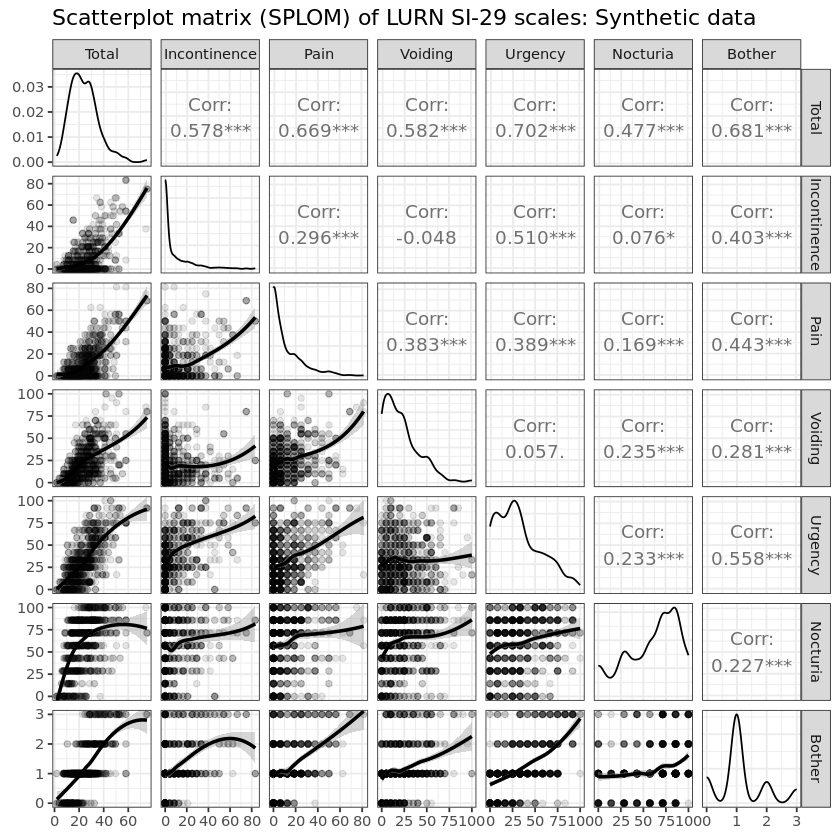

In [4]:
ggpairs(
    splom_dat,
    lower = list(continuous = wrap("smooth_loess", alpha = 1 / 10)),
    columnLabels = c("Total", "Incontinence", "Pain", "Voiding", "Urgency",
    "Nocturia", "Bother"),
    title = "Scatterplot matrix (SPLOM) of LURN SI-29 scales: Synthetic data"
) +
theme_bw()

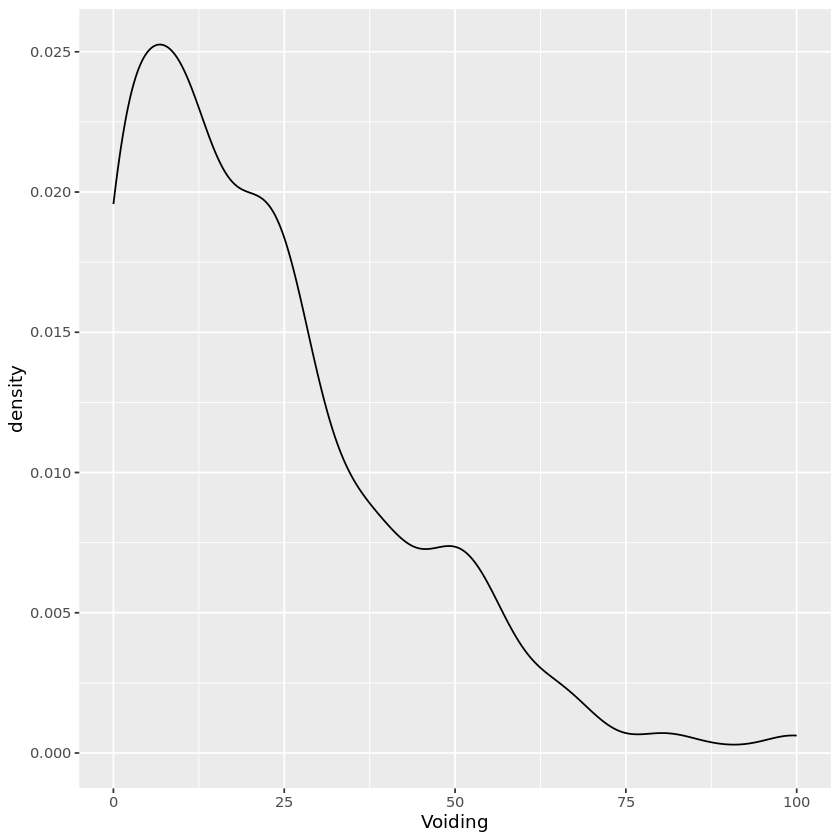

In [5]:
ggplot(splom_dat, aes(x = Voiding)) + geom_density()

In [6]:
si_29_m_nms <- lurn_si_29_names("male")
si29_prelim_freq_table <- t(apply(syn[si_29_m_nms],
                                  2,
                                  function(x) table(factor(x, levels = 0:4),
                                                    useNA = "always")))

si29_prelim_prop_table <- prop.table(si29_prelim_freq_table, margin = 1)

colnames(si29_prelim_prop_table) <- c("0", "1", "2", "3", "4", "Missing")

si29_prelim_freq_table

,0,1,2,3,4,NA
SI29_Q1,805,136,31,25,3,0
SI29_Q2,641,249,51,58,1,0
SI29_Q3,804,122,33,23,18,0
SI29_Q4,802,135,17,21,25,0
SI29_Q5,858,116,17,6,3,0
SI29_Q6,830,92,30,29,19,0
SI29_Q7,806,122,44,22,6,0
SI29_Q8,508,287,80,104,21,0
SI29_Q9,753,183,35,19,10,0
SI29_Q10,839,134,11,15,1,0


In [7]:
this_patient_row <- syn[100, si_29_m_nms]
this_patient_row

,SI29_Q1,SI29_Q2,SI29_Q3,SI29_Q4,SI29_Q5,SI29_Q6,SI29_Q7,SI29_Q8,SI29_Q9,SI29_Q10,⋯,SI29_Q19,SI29_Q20,SI29_Q21,SI29_Q22,SI29_Q23,SI29_Q24,SI29_Q25,SI29_Q26,SI29_Q27b,SI29_Q28
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
100,0,0,0,0,0,0,1,1,0,0,⋯,1,3,3,3,1,0,2,1,1,1


In [8]:
syn[, si_29_m_nms[1]]

[1] 3 3 0 0 0 0 0 3 0 0 0 3 0 1 2 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 3
  [38] 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 2 0 0 1 0 1 0 2 1 0 0 0 0 0 0 0 0 0 0 0 2
  [75] 2 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 1 0 1 0 0 1 0 0 0 0 0 0 0
 [112] 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 2 2 0 0 3 0 0 0 0
 [149] 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 [186] 0 0 0 0 0 0 0 0 0 2 0 1 0 0 0 0 0 0 2 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0
 [223] 0 1 0 1 0 0 0 0 0 0 0 3 0 0 0 1 0 4 0 0 2 0 0 1 0 0 1 1 0 0 3 1 0 3 1 0 0
 [260] 0 0 0 0 0 0 3 0 0 0 0 2 0 0 0 0 0 0 0 0 0 1 0 0 0 3 1 3 0 0 3 0 1 0 0 0 0
 [297] 0 0 0 0 0 1 0 0 2 3 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 2 1 0 0 1 1 0 0 0 0 0 3
 [334] 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 3
 [371] 0 0 0 0 1 0 0 0 1 0 2 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 1
 [408] 1 0 2 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 [445] 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 [482] 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 [519] 0 1 0 1 0 3 0 1 0 0 0 0 0 1 3 0 0 0 1 0 0 1 2 0 1 0 0 0 0 0 0 0 2 0 1 0 0
 [556] 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 2 0
 [593] 0 2 0 0 0 1 0 0 0 3 0 0 0 0 0 0 2 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0
 [630] 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 3 1 0 0 0 0 0 1
 [667] 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 2 1 0 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 1
 [704] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 [741] 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 2 0 0 0 0 0 0 1 0 0 0 0 3 0 0 0 0 0 0 0 0
 [778] 0 0 0 0 1 0 0 0 0 2 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0
 [815] 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 [852] 0 0 0 0 2 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 [889] 0 0 0 0 1 1 0 4 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 1 0 0 0 0 0 0
 [926] 0 0 1 0 0 0 0 1 0 0 0 1 0 0 3 0 0 0 0 2 0 0 0 1 0 0 0 0 0 1 1 0 0 0 3 0 0
 [963] 0 1 1 0 0 0 2 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 1
[1000] 0

In [9]:
for (cc in si_29_m_nms){
    print(median(syn[, cc], na.rm = TRUE))
}

[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 1
[1] 1
[1] 1
[1] 1
[1] 1
[1] 1
[1] 2
[1] 3
[1] 1
[1] 3
[1] 2
[1] 0
[1] 1
[1] 0
[1] 1
[1] 1


## Long file

### Spaghetti plot

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 163 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 29 rows containing missing values (`geom_line()`).”


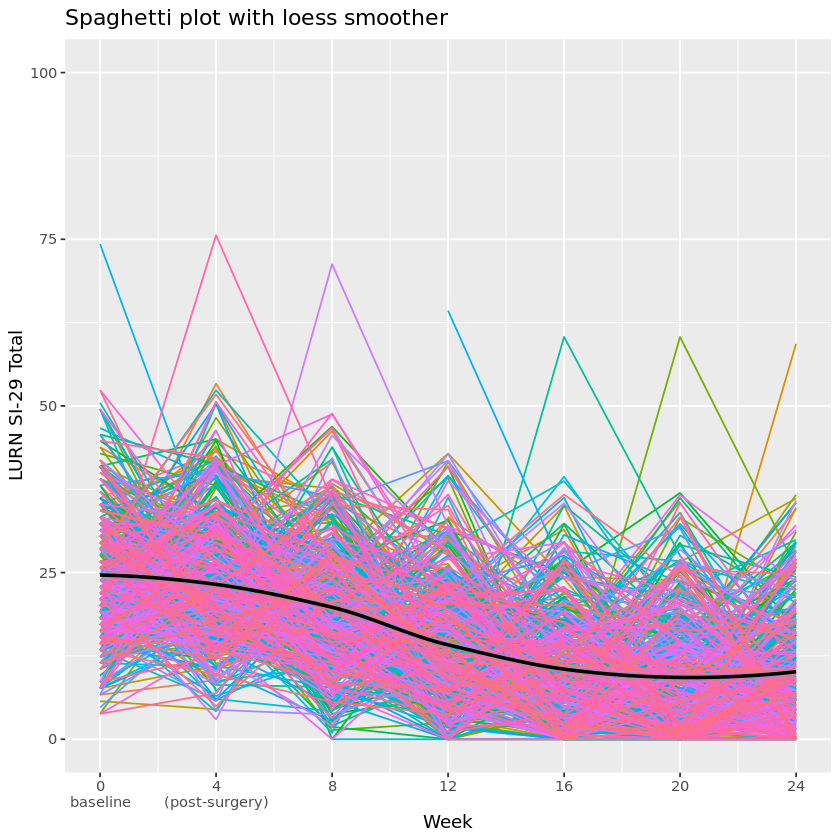

In [10]:
syn_long <- read.csv("../data/syn_long.csv", header = TRUE)
patient_cells <- list()
syn_long$ID <- factor(syn_long$ID)

breaks <- seq(0, 24, 4)
labels <- c("0\nbaseline", "4\n(post-surgery)", "8", "12", "16", "20", "24")

# Spaghetti Plots
ggplot(data = syn_long,
                   aes(Week,
                       lurn_si_29_total_score,
                       group = ID,
                       colour = ID)) +
  geom_line(show.legend = FALSE) +
  geom_smooth(data = syn_long,
              aes(Week,
                  lurn_si_29_total_score),
              method = "loess",
    show.legend = FALSE,
    se = TRUE,
    inherit.aes = FALSE,
    color = "black") + 
  scale_y_continuous("LURN SI-29 Total", limits = c(0, 100)) +
  scale_x_continuous(breaks = breaks, labels = labels) +
  ggtitle("Spaghetti plot with loess smoother")

In [11]:
head(syn_long)

,ID,SEX,SI29_Q1,SI29_Q2,SI29_Q3,SI29_Q4,SI29_Q5,SI29_Q6,SI29_Q7,SI29_Q8,⋯,lurn_si_29_nocturia_score,lurn_si_29_bother,lurn_si_29_note,lurn_si_29_total_count_valid,lurn_si_29_incontinence_count_valid,lurn_si_29_pain_count_valid,lurn_si_29_voiding_count_valid,lurn_si_29_urgency_count_valid,lurn_si_29_nocturia_count_valid,Week
,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<lgl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,3,1,0,0,0,0,0,0,0,0,⋯,71.42857,1.0000000,NA,28,6,4,5,3,2,0
2,3,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,72.56127,0.8928169,NA,NA,NA,NA,NA,NA,NA,4
3,3,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,77.71769,0.0000000,NA,NA,NA,NA,NA,NA,NA,8
4,3,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,60.70400,0.0000000,NA,NA,NA,NA,NA,NA,NA,12
5,3,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,84.94054,0.0000000,NA,NA,NA,NA,NA,NA,NA,16
6,3,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,0.0000000,NA,NA,NA,NA,NA,NA,NA,20


### radar plot

In [12]:
colnames(syn_long)
id = 3
patient_long <- syn_long[syn_long$ID == id, ]

patient_radar_data <- patient_long[c("Week",splom_vars)]
patient_radar_data$Week <- as.factor(patient_radar_data$Week)
names(patient_radar_data)<- c("Time", "Total","Incontinence", "Pain", "Voiding", "Urgency", "Nocturia", "Bother")
# I need to find a way to handle NaN values for the radar plot
patient_radar_data[is.na(patient_radar_data)] = 0
patient_radar_data 

[1] "ID"                                  "SEX"                                
 [3] "SI29_Q1"                             "SI29_Q2"                            
 [5] "SI29_Q3"                             "SI29_Q4"                            
 [7] "SI29_Q5"                             "SI29_Q6"                            
 [9] "SI29_Q7"                             "SI29_Q8"                            
[11] "SI29_Q9"                             "SI29_Q10"                           
[13] "SI29_Q11"                            "SI29_Q12"                           
[15] "SI29_Q13"                            "SI29_Q14"                           
[17] "SI29_Q15"                            "SI29_Q16"                           
[19] "SI29_Q17"                            "SI29_Q18"                           
[21] "SI29_Q19"                            "SI29_Q20"                           
[23] "SI29_Q21"                            "SI29_Q22"                           
[25] "SI29_Q23"                            "SI29_Q24"                           
[27] "SI29_Q25"                            "SI29_Q26"                           
[29] "SI29_Q27a"                           "SI29_Q27b"                          
[31] "SI29_Q28"                            "Race"                               
[33] "Hispanic"                            "PROMIS_Dep_TScore"                  
[35] "PROMIS_Anx_TScore"                   "Age"                                
[37] "BMI"                                 "lurn_si_29_total_score"             
[39] "lurn_si_29_incontinence_score"       "lurn_si_29_pain_score"              
[41] "lurn_si_29_voiding_score"            "lurn_si_29_urgency_score"           
[43] "lurn_si_29_nocturia_score"           "lurn_si_29_bother"                  
[45] "lurn_si_29_note"                     "lurn_si_29_total_count_valid"       
[47] "lurn_si_29_incontinence_count_valid" "lurn_si_29_pain_count_valid"        
[49] "lurn_si_29_voiding_count_valid"      "lurn_si_29_urgency_count_valid"     
[51] "lurn_si_29_nocturia_count_valid"     "Week"

,Time,Total,Incontinence,Pain,Voiding,Urgency,Nocturia,Bother
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,17.142857,0,0.00000,15.00000,16.66667,71.42857,1.0000000
2,4,16.658145,0,0.00000,15.52979,16.14662,72.56127,0.8928169
3,8,30.862485,0,20.01574,51.38521,35.34490,77.71769,0.0000000
4,12,13.852060,0,13.88818,23.74672,0.00000,60.70400,0.0000000
5,16,11.563419,0,0.00000,31.47591,0.00000,84.94054,0.0000000
6,20,3.137230,0,0.00000,24.34887,18.43554,0.00000,0.0000000
7,24,9.065776,0,0.00000,0.00000,18.43752,71.62854,0.0000000


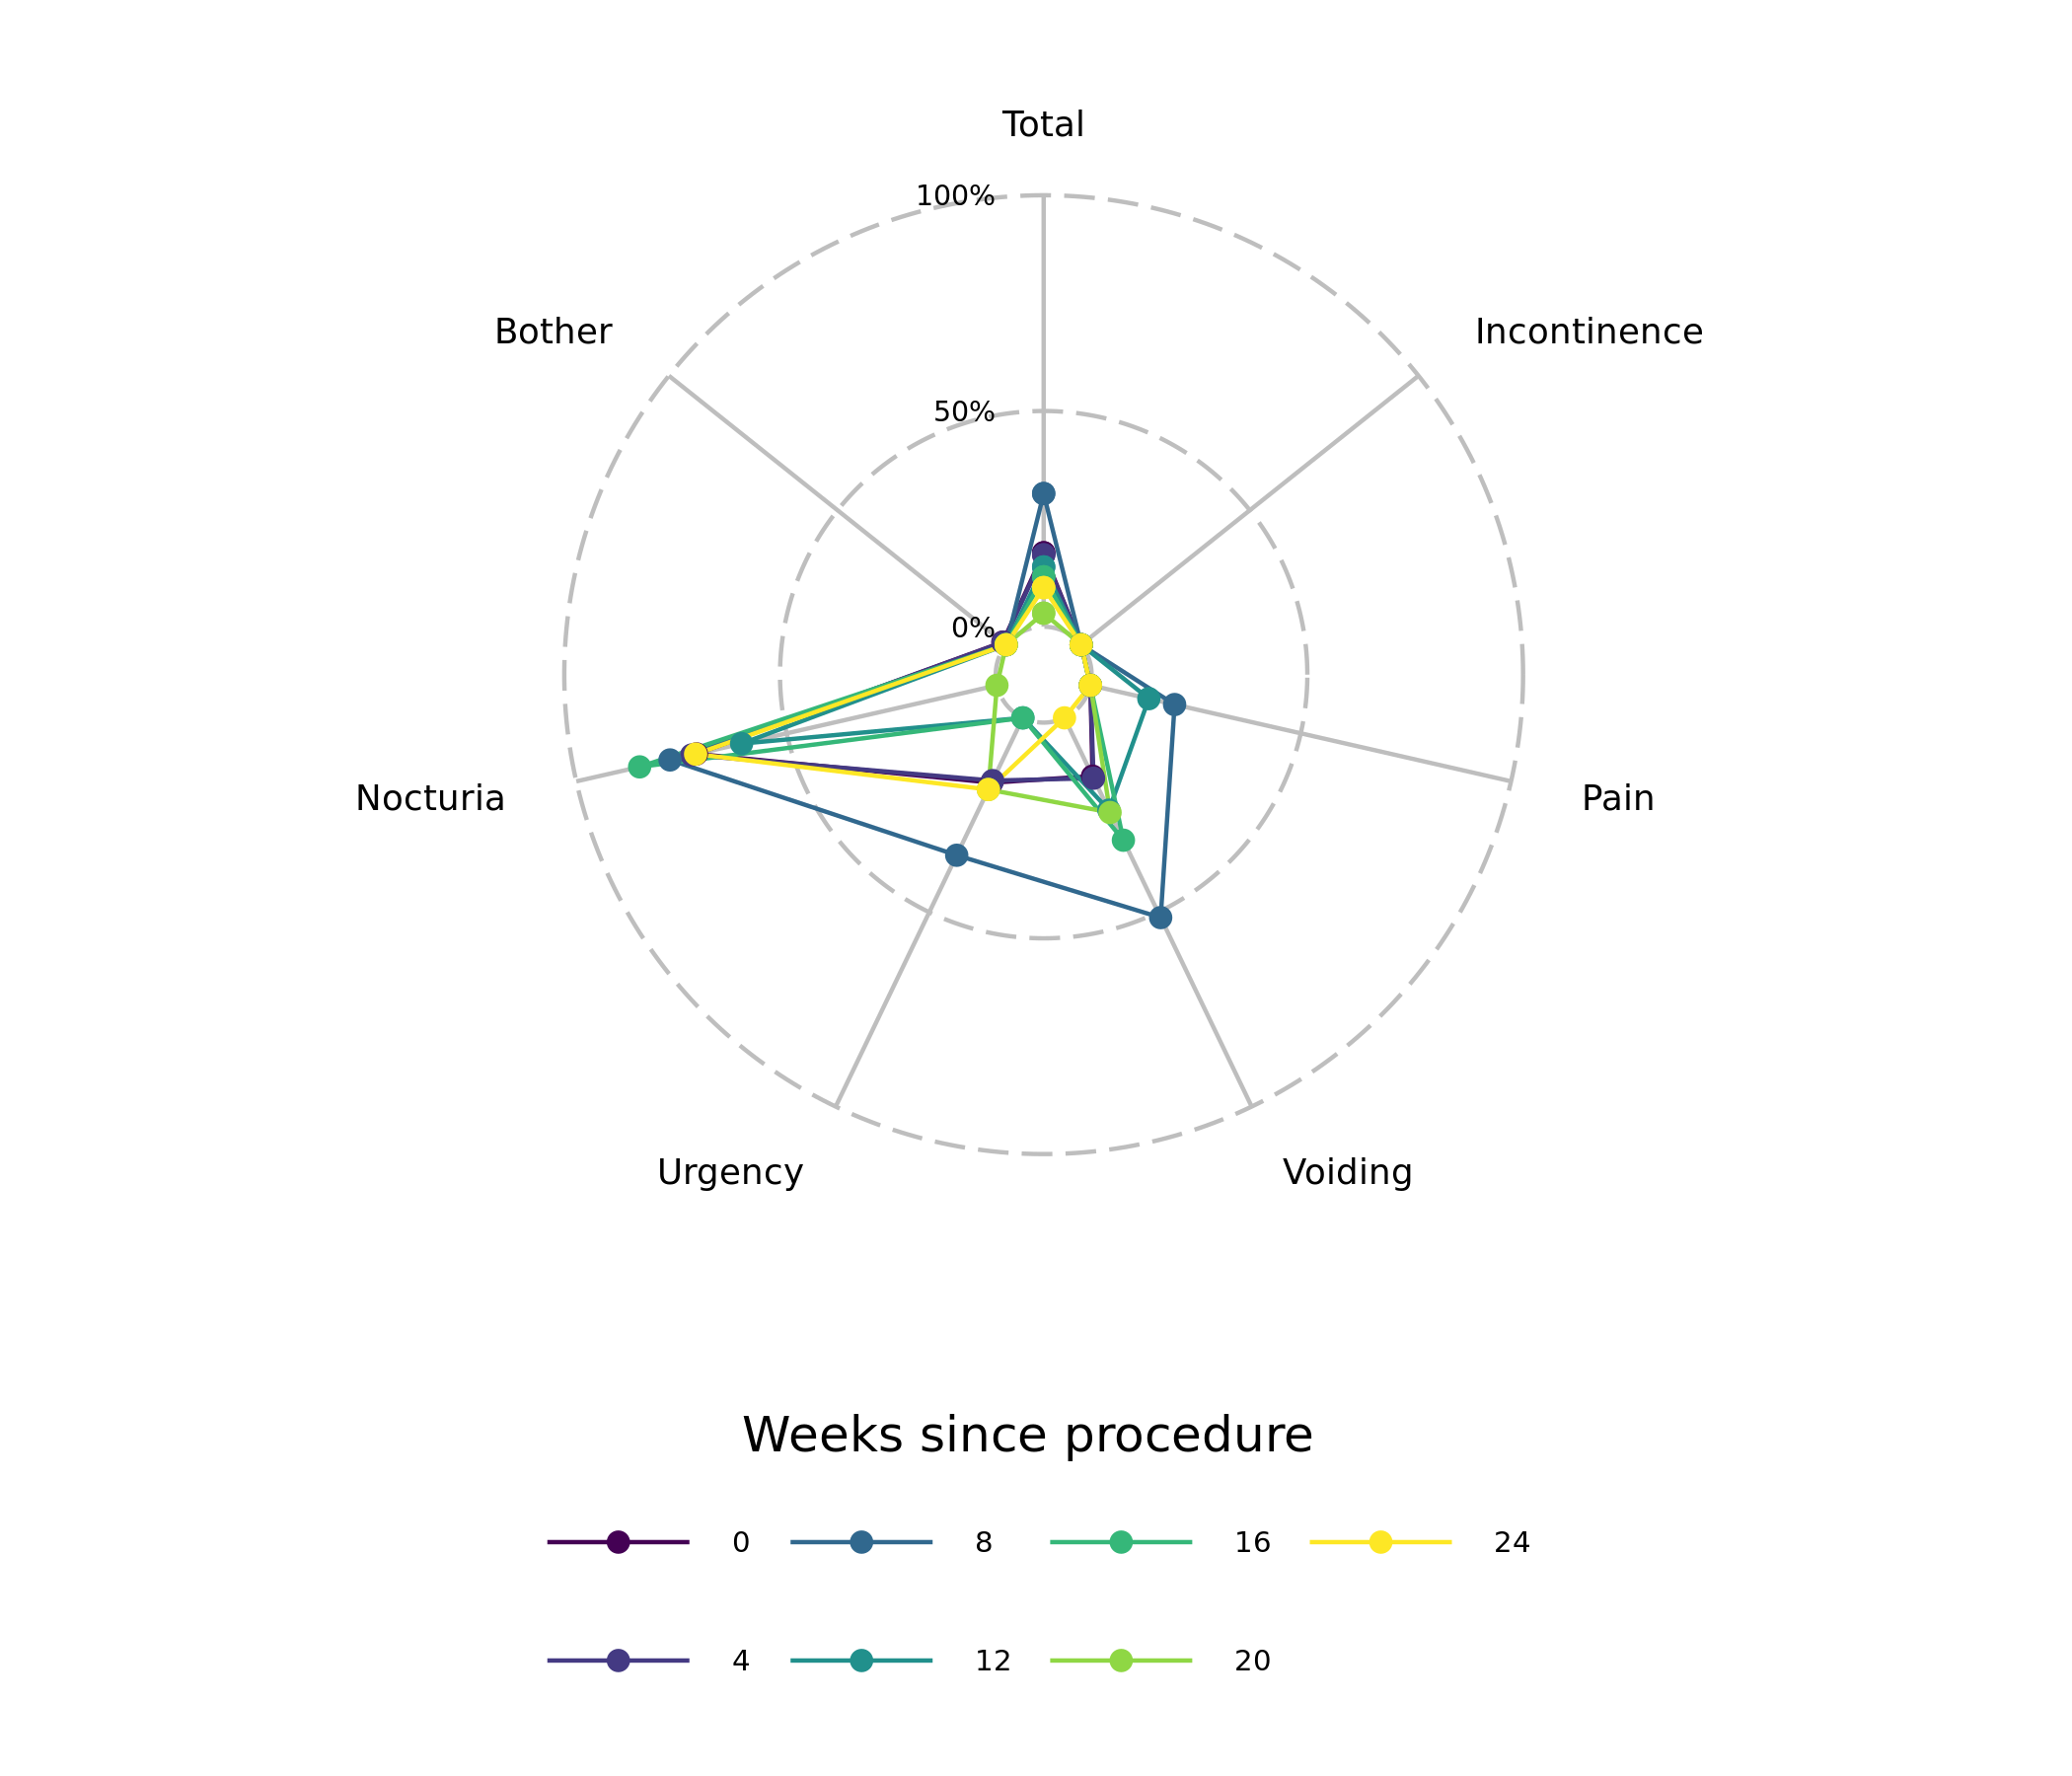

In [13]:
options(jupyter.plot_mimetypes = "image/png", repr.plot.width = 7, repr.plot.height = 6., repr.plot.res = 300)

ggradar(patient_radar_data, grid.min = 0, grid.mid = 50, grid.max = 100, gridline.mid.colour = "grey",
        label.gridline.mid = TRUE,
        group.colours = viridis(length(patient_radar_data) - 1),
        background.circle.transparency = 0,
        legend.title = "Weeks since procedure", 
        plot.extent.x.sf = 1.3,
        axis.label.size = 3, 
        grid.label.size = 3,
        group.point.size = 2,
        group.line.width = 0.5,
    ) + 
    theme(
        text = element_text(size = 12), 
        legend.text = element_text(size = 7),
        legend.position = c(0.75, -0.35),  
        legend.justification = c(1, 0),
        plot.margin = grid::unit(c(-0.2,0,0,0), "null")
    )  + 
    guides(color = guide_legend(nrow = 2))

In [14]:
# read in the patient database
syn <- read.csv("../data/LURN_SI29_Synth_Final_NoFmt.csv", header = TRUE)
names(syn)[names(syn) == "Sex"] <- "SEX"
syn <- score_lurn_si_29(syn)
splom_vars <- c(
   "lurn_si_29_total_score", "lurn_si_29_incontinence_score",
   "lurn_si_29_pain_score", "lurn_si_29_voiding_score",
   "lurn_si_29_urgency_score", "lurn_si_29_nocturia_score",
   "lurn_si_29_bother")

# simplified dataframe for plots
splom_dat <- syn[c("ID", splom_vars)]
names(splom_dat)<- c("ID", "Total", "Incontinence", "Pain", "Voiding", "Urgency", "Nocturia", "Bother")

# read in the time series file
syn_long <- read.csv("../data/syn_long.csv", header = TRUE)
patient_cells <- list()
syn_long$ID <- factor(syn_long$ID)
syn_long_dat <- syn_long[c("ID", "Week", splom_vars)]
names(syn_long_dat)<- c("ID", "Week", "Total", "Incontinence", "Pain", "Voiding", "Urgency", "Nocturia", "Bother")

In [15]:
patient_id <- 100
patient_week <- 12
input_params <- list(
    patient_week = patient_week,
    patient_id = patient_id, 
    patient_row = which(splom_dat$ID == patient_id)[1]
)
input_params


# grab the appropriate week for the current symptoms plot
syn_week <- syn_long[syn_long$Week == input_params$patient_week, ]
syn_week_dat <- syn_long_dat[syn_long_dat$Week == input_params$patient_week, ]


$patient_week
[1] 12

$patient_id
[1] 100

$patient_row
[1] 100

In [16]:
head(syn_long_dat)

,ID,Week,Total,Incontinence,Pain,Voiding,Urgency,Nocturia,Bother
,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,3,0,17.14286,0,0.00000,15.00000,16.66667,71.42857,1.0000000
2,3,4,16.65814,0,0.00000,15.52979,16.14662,72.56127,0.8928169
3,3,8,30.86248,0,20.01574,51.38521,35.34490,77.71769,0.0000000
4,3,12,13.85206,0,13.88818,23.74672,0.00000,60.70400,0.0000000
5,3,16,11.56342,0,0.00000,31.47591,0.00000,84.94054,0.0000000
6,3,20,3.13723,0,0.00000,24.34887,18.43554,NA,0.0000000


### line plot with smoothing

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


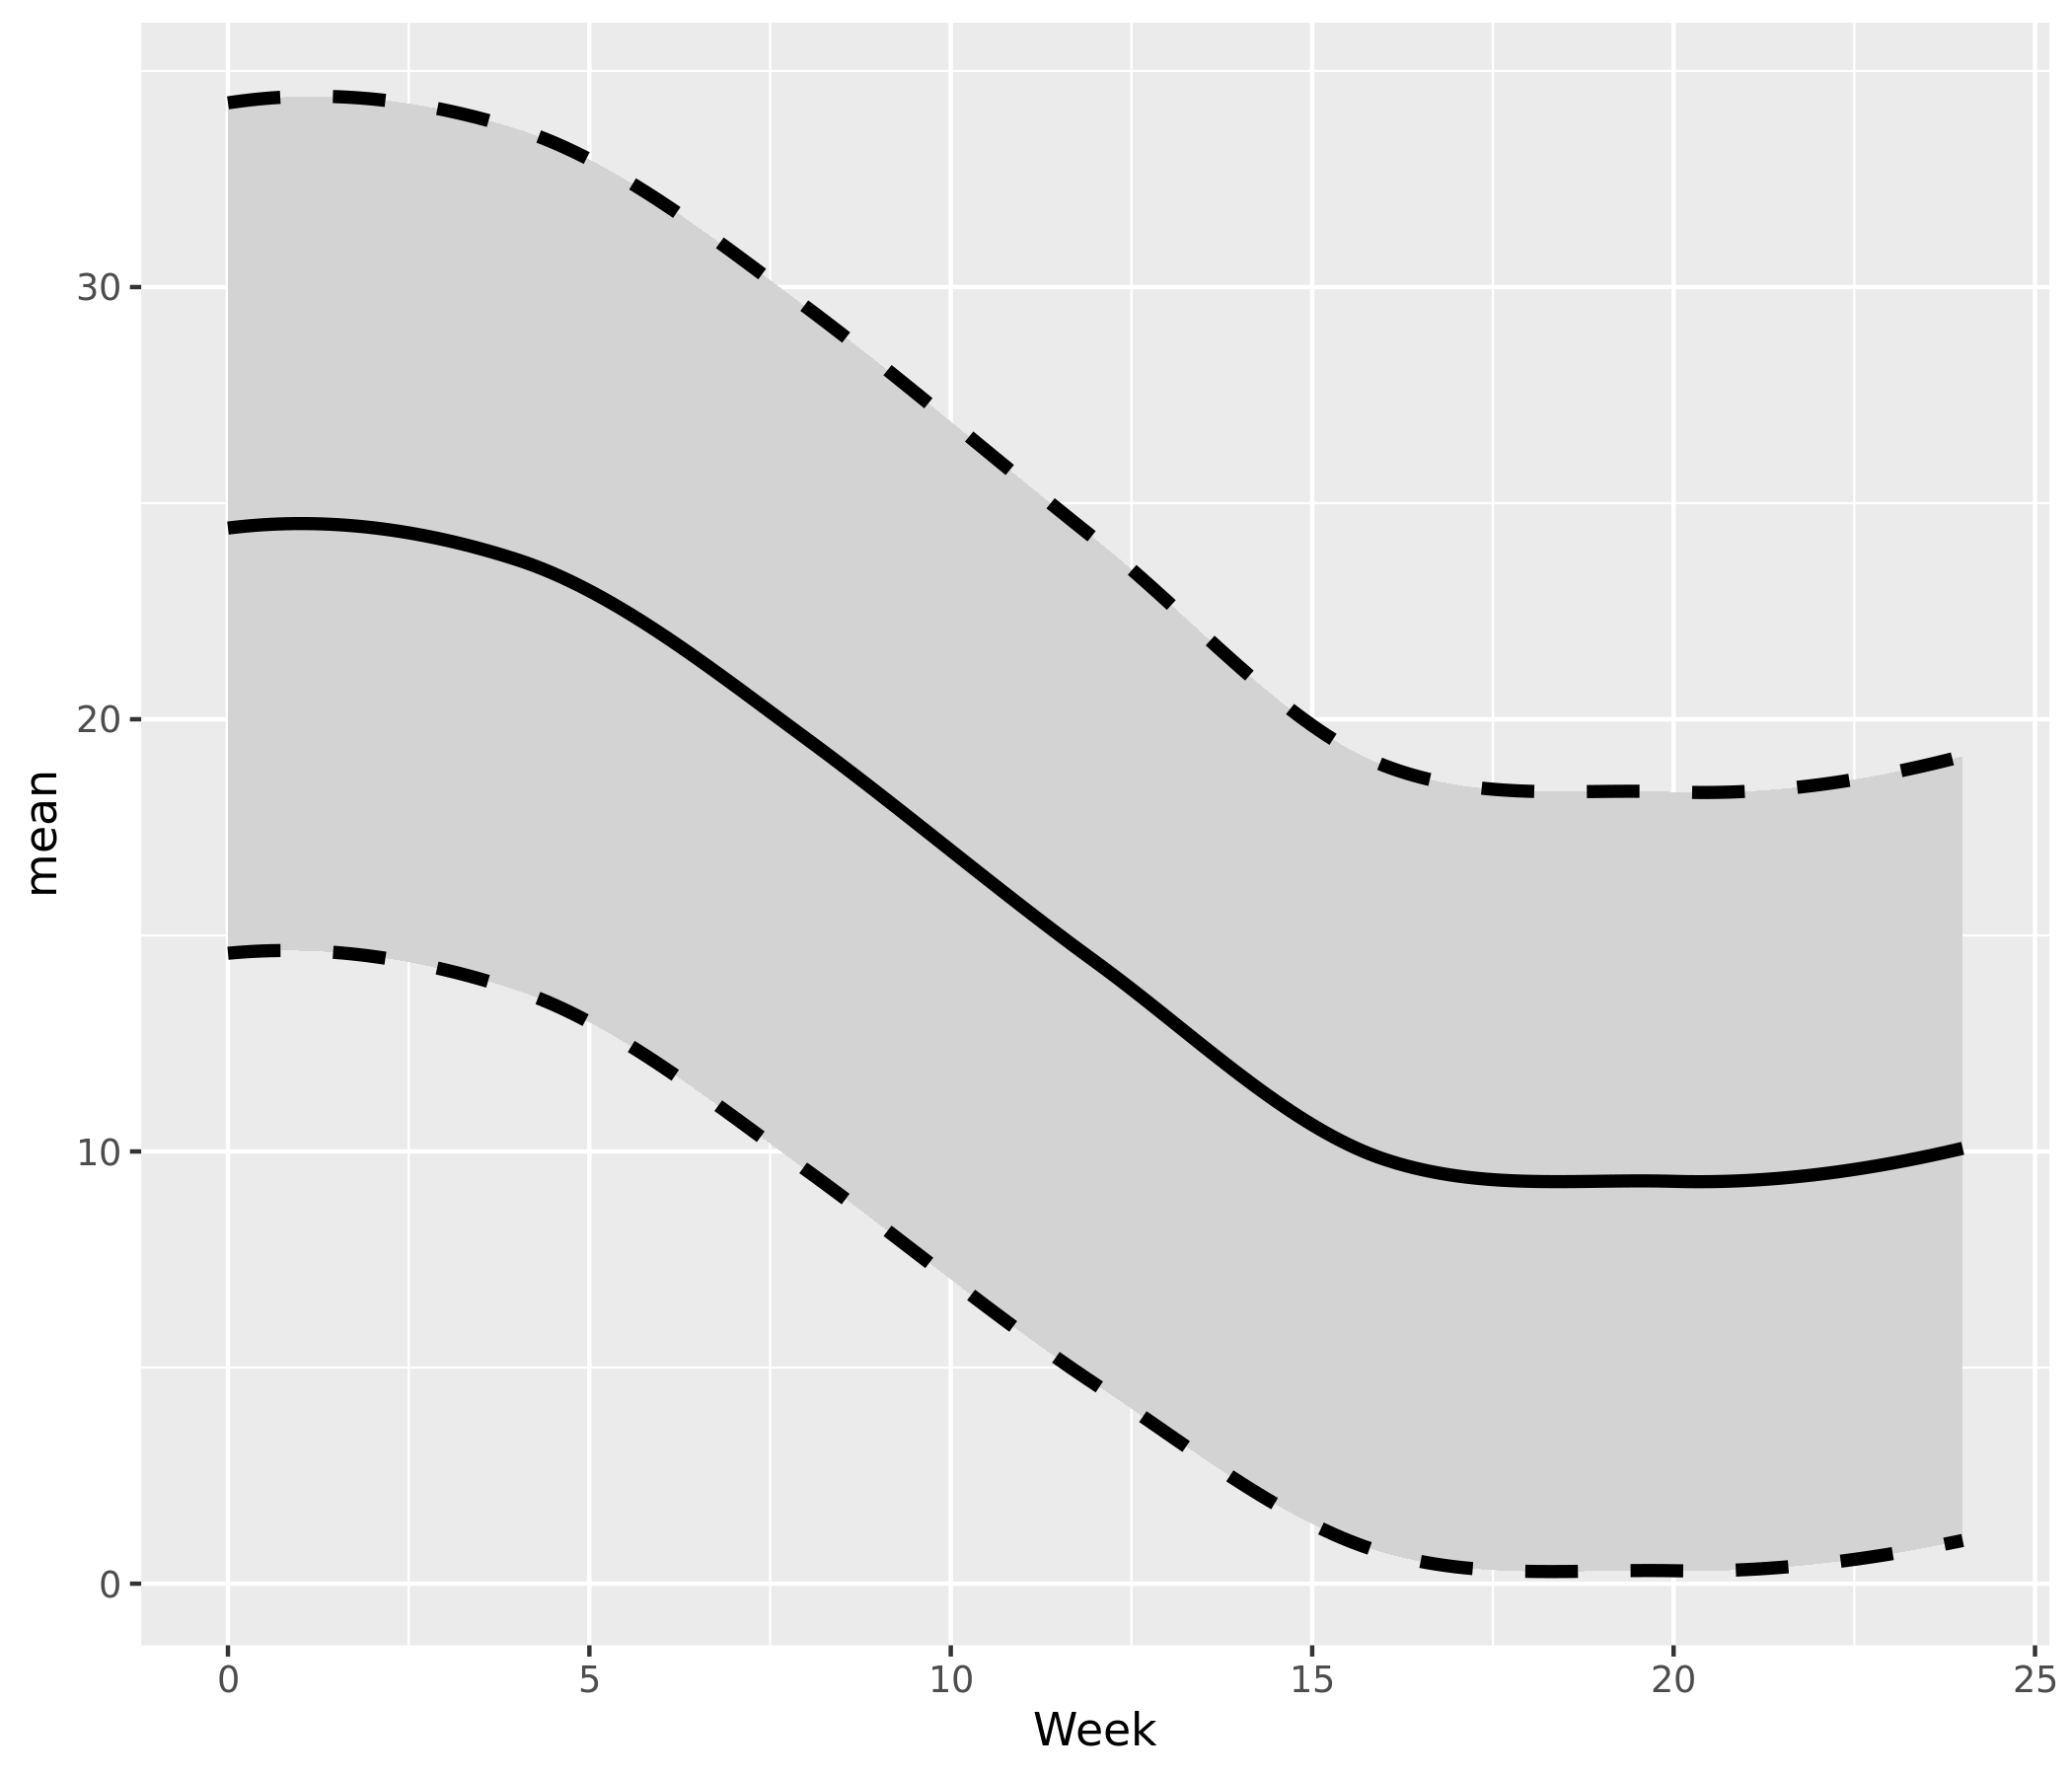

In [17]:
line_df_input <- syn_long_dat[c("ID", "Week", "Total")]
line_df_summary <- line_df_input %>%
	group_by(Week) %>%
	summarise(
        mean = mean(Total, na.rm = TRUE), 
        sd = sd(Total, na.rm = TRUE),
    )

# loess regression
span <- 0.75
loess_mean <- loess(mean ~ Week, data = line_df_summary, span = span)
loess_sd <- loess(sd ~ Week, data = line_df_summary, span = span)

# new dataframe to plot
Week <- seq(min(line_df_summary$Week), max(line_df_summary$Week), by = 0.1)
line_df_plot <- data.frame(Week)
line_df_plot$mean <- predict(loess_mean, line_df_plot)
line_df_plot$hi <- line_df_plot$mean + predict(loess_sd, line_df_plot)
line_df_plot$lo <- line_df_plot$mean - predict(loess_sd, line_df_plot)

patient_line_data <- line_df_input[line_df_input$ID == 100, ]
patient_line_data$hi <- predict(loess_mean, patient_line_data) + predict(loess_sd, patient_line_data)

ggplot(data = line_df_plot, aes(x = Week)) + 
    geom_ribbon(aes(ymin = lo, ymax = hi), fill = "lightgray") +
    geom_line(aes(Week, mean), color = "black", size = 1.5) + 
    geom_line(aes(Week, hi), color = "black", linetype = "dashed", size = 1.5) + 
    geom_line(aes(Week, lo), color = "black", linetype = "dashed", size = 1.5)



In [18]:
patient_line_data

,ID,Week,Total,hi
,<fct>,<int>,<dbl>,<dbl>
309,100,0,27.619048,34.26173
310,100,4,14.626108,33.65786
311,100,8,28.679136,29.53708
312,100,12,15.426963,24.16572
313,100,16,4.678142,18.92635
314,100,20,0.000000,18.31893
315,100,24,34.730814,19.14573


In [19]:
head(splom_dat)

,ID,Total,Incontinence,Pain,Voiding,Urgency,Nocturia,Bother
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,15.23810,45.833333,0,5,0.000000,0.00000,1
2,2,27.61905,20.833333,0,30,8.333333,71.42857,2
3,3,17.14286,0.000000,0,15,16.666667,71.42857,1
4,4,10.47619,0.000000,0,0,8.333333,57.14286,1
5,5,36.19048,4.166667,25,55,41.666667,85.71429,1
6,6,24.76190,0.000000,25,35,8.333333,71.42857,1


In [20]:
col <- "Pain"
line_df_input <- syn_long_dat[c("ID", "Week", col)]
line_df_summary <- line_df_input %>%
    group_by(Week) %>%
    summarise(
        mean = mean(!!sym(col), na.rm = TRUE), 
        sd = sd(!!sym(col), na.rm = TRUE),
    )

# loess regression
span <- 0.75
loess_mean <- loess(mean ~ Week, data = line_df_summary, span = span)
loess_sd <- loess(sd ~ Week, data = line_df_summary, span = span)

# new dataframe to plot
Week <- seq(min(line_df_summary$Week), max(line_df_summary$Week), by = 0.1)
line_df_plot <- data.frame(Week)
line_df_plot$mean <- predict(loess_mean, line_df_plot)
line_df_plot$hi <- pmin(line_df_plot$mean + predict(loess_sd, line_df_plot), 100)
line_df_plot$lo <- pmax(line_df_plot$mean - predict(loess_sd, line_df_plot), 0)
line_df_plot

Week,mean,hi,lo
<dbl>,<dbl>,<dbl>,<dbl>
0.0,10.83546,24.40835,0
0.1,10.84536,24.42061,0
0.2,10.85400,24.43110,0
0.3,10.86139,24.43983,0
0.4,10.86754,24.44683,0
0.5,10.87248,24.45211,0
0.6,10.87619,24.45568,0
0.7,10.87871,24.45755,0
0.8,10.88005,24.45774,0


## bar chart of all the symptons

In [21]:
symptoms <- c("Incontinence", "Pain", "Voiding", "Urgency", "Nocturia", "Bother", "Total")

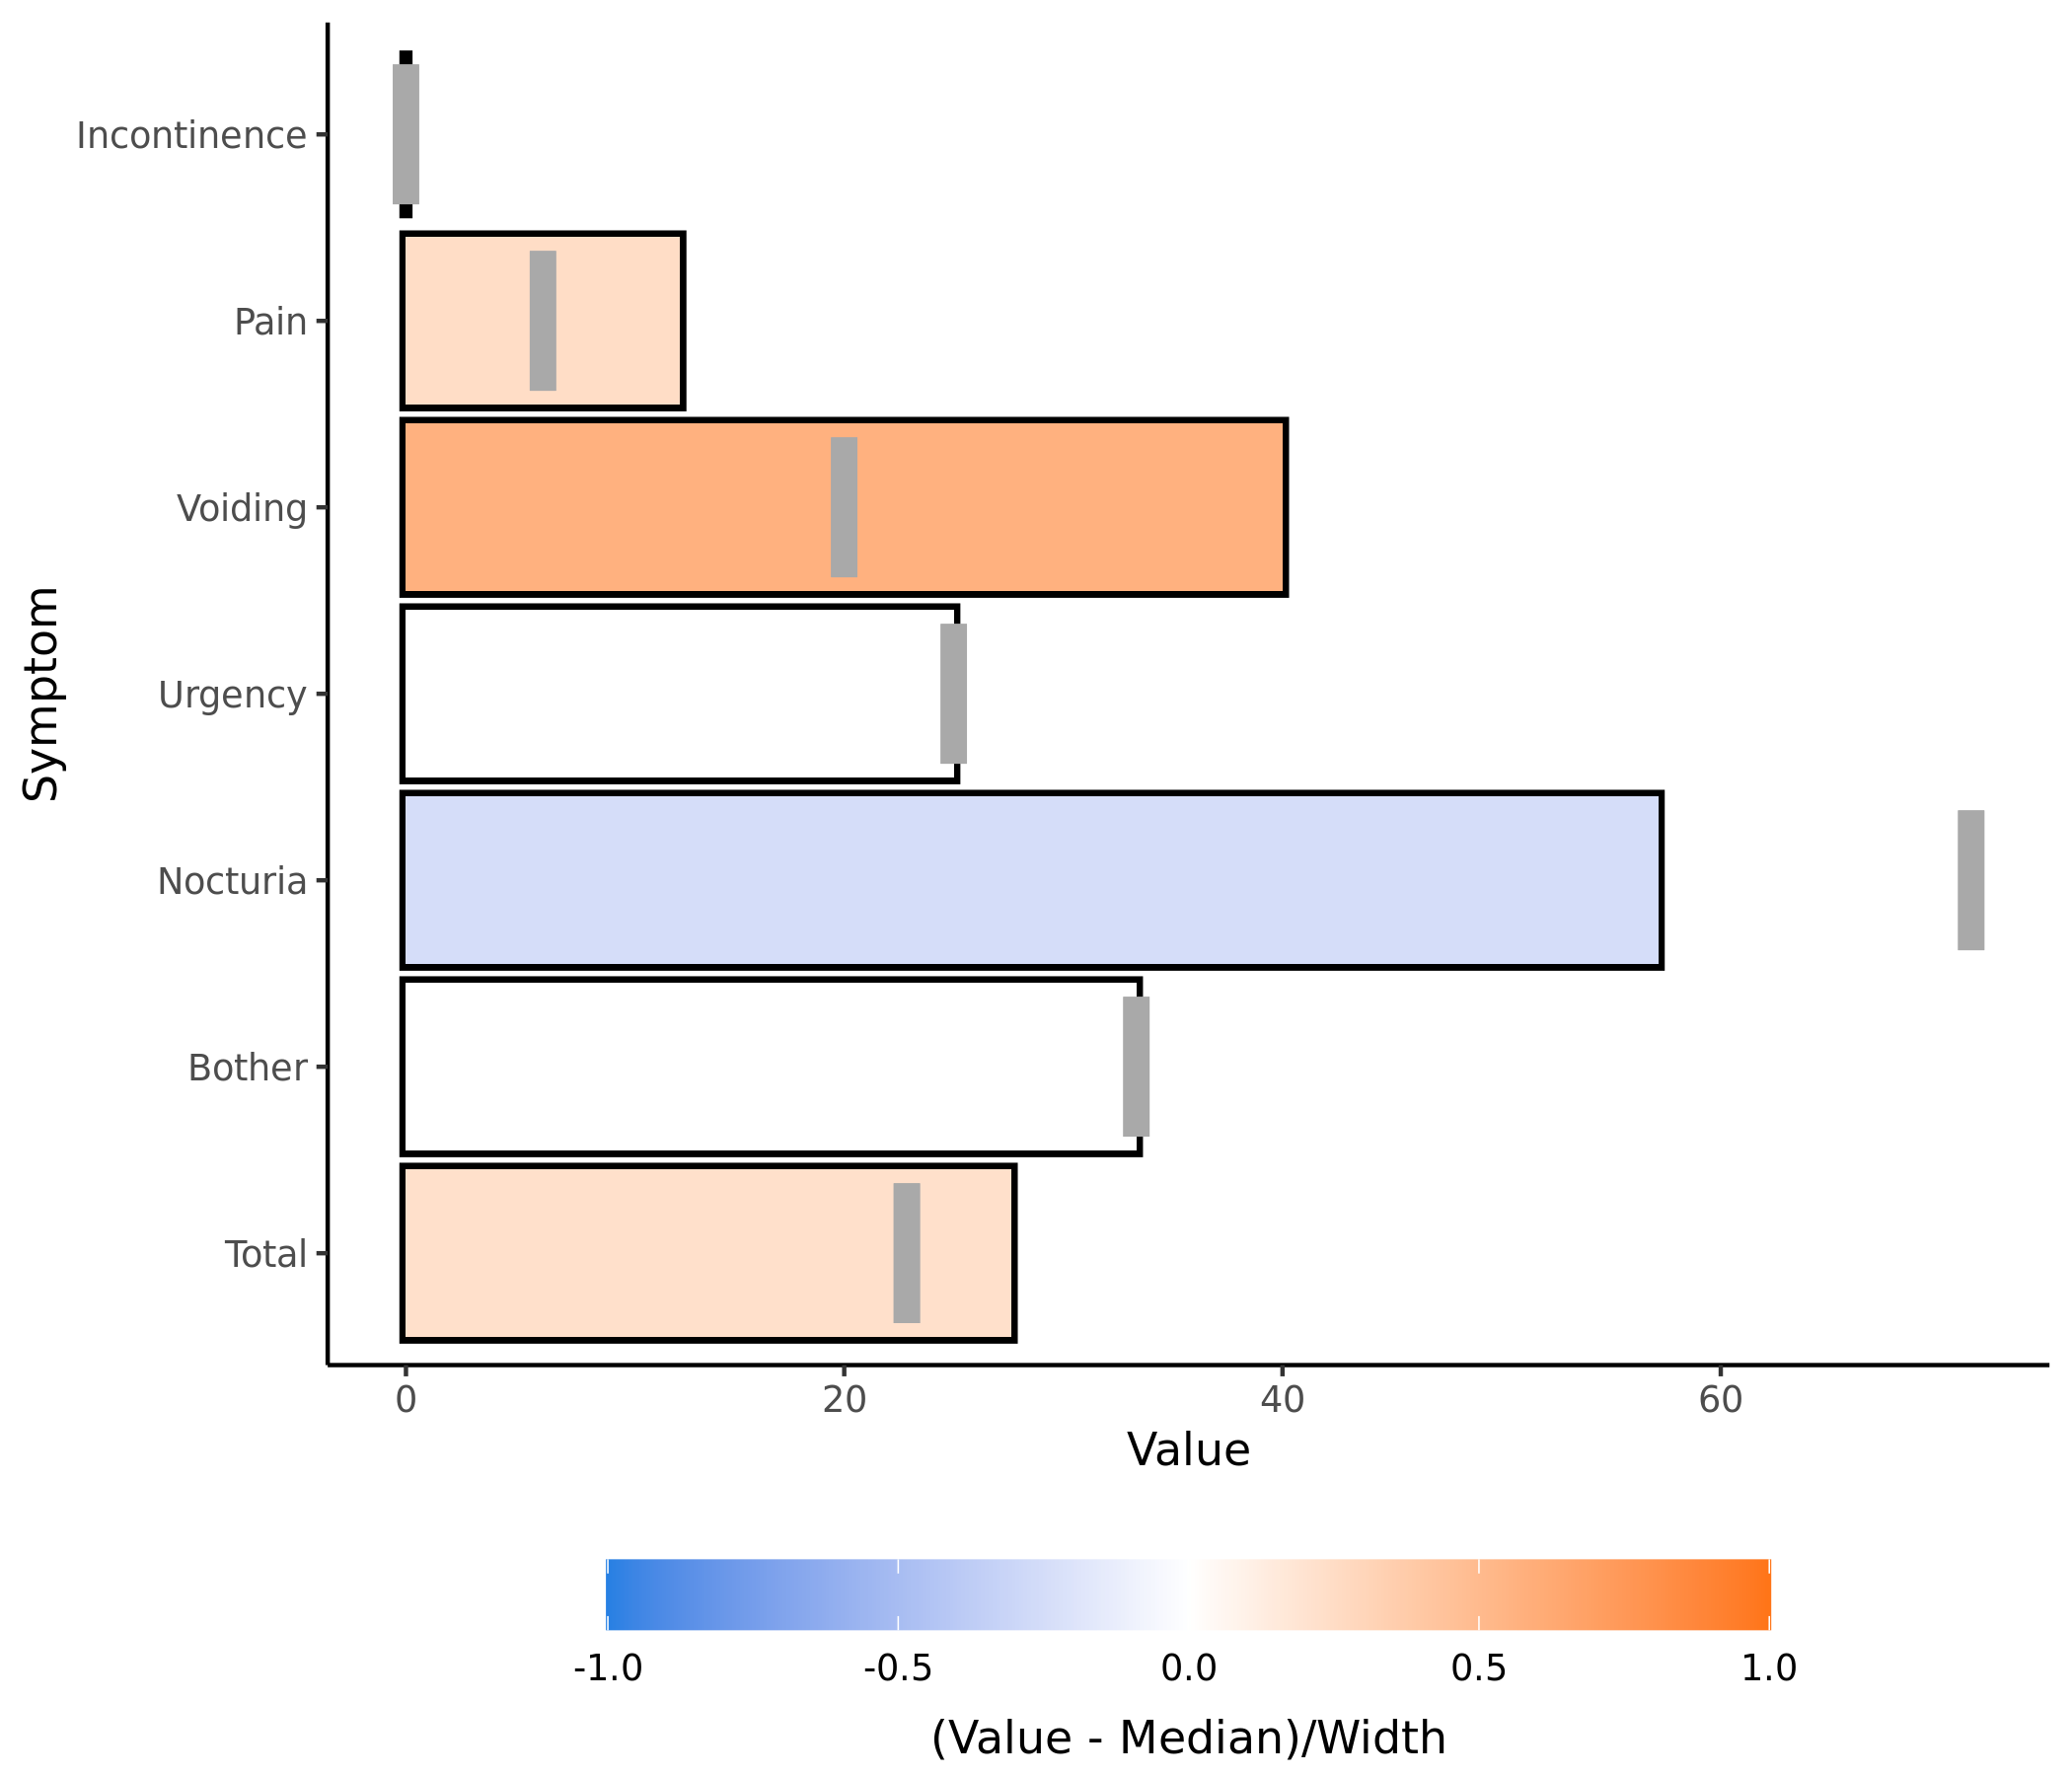

In [22]:
# Function to rescale a column to a specific range
rescale_to_range <- function(x, new_min, new_max) {
    scaled <- (x - min(x, na.rm = TRUE))/(max(x, na.rm = TRUE) - min(x, na.rm = TRUE))  # Scale to range [0, 1]
    scaled_rescaled <- ifelse(is.na(x), NA, scaled*(new_max - new_min) + new_min)  # Rescale to new range
    return(scaled_rescaled)
}
splom_dat$Bother <- rescale_to_range(splom_dat$Bother, 0, 100)


# create a summary for each of the columns for all patients as a comparison
df <- select(splom_dat, -ID)
summary_df <- data.frame(
    Median = apply(df, 2, median),
    Percentile_16 = apply(df, 2, function(x) quantile(x, probs = 0.16)),
    Percentile_84 = apply(df, 2, function(x) quantile(x, probs = 0.84))
)

# Add a row for the full 1sigma width
summary_df$Width <- summary_df$Percentile_84 - summary_df$Percentile_16

# add the symptoms in the correct order
summary_df$Symptom <- factor(rownames(summary_df), levels = symptoms)

# get the patient data for the bar chart
df_patient <- select(splom_dat[input_params$patient_row, ], -ID)
p <- as.data.frame(t(df_patient))
summary_df$Value <- p[, 1]


# Define a custom color palette
custom_palette <- c("#2780E3", "white", "#ff7518")

g <- ggplot(summary_df, aes(x = Symptom, y = Value, fill = (Value - Median)/Width)) +
    scale_x_discrete(limits = rev(levels(summary_df$Symptom))) +
    geom_bar(stat = "identity", fill = "white", color = "black", size = 1.5) + 
    geom_bar(stat = "identity") + 
    scale_fill_gradient2(
        low = custom_palette[1], 
        mid = custom_palette[2], 
        high = custom_palette[3],
        midpoint = 0, 
        limits = c(-1, 1),
        oob = scales::squish
    ) +    
    #geom_errorbar(data = summary_df, aes(y = NULL, ymin = Percentile_16, ymax = Percentile_84), width = 0.2, color = "black") +
    geom_errorbar(data = summary_df, aes(y = NULL, ymin = Median, ymax = Median), width = 0.75, color = "darkgray", size = 3) +
    # geom_point(data = summary_df, aes(y = Median), size = 3, color = "black") + 
    coord_flip() + 
    theme_classic() +
    guides(fill = guide_colorbar(title.position = "bottom",
        title.hjust = 0.5,
        title.vjust = 0,
        label.position = "bottom")
    ) +  
    theme(
        legend.position = "bottom",           
        legend.key.width = unit(2, "cm"),
        legend.title.align = 0.5,
        legend.margin = margin(t = 10)
    )    
g

In [23]:
summary_df


,Median,Percentile_16,Percentile_84,Width,Symptom,Value
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
Total,22.85714,13.333333,34.28571,20.95238,Total,27.61905
Incontinence,0.00000,0.000000,20.83333,20.83333,Incontinence,0.00000
Pain,6.25000,0.000000,25.00000,25.00000,Pain,12.50000
Voiding,20.00000,5.000000,40.00000,35.00000,Voiding,40.00000
Urgency,25.00000,8.333333,58.33333,50.00000,Urgency,25.00000
Nocturia,71.42857,28.571429,85.71429,57.14286,Nocturia,57.14286
Bother,33.33333,0.000000,66.66667,66.66667,Bother,33.33333


# For the time series, Try creating a "bubble chart" 

where each cell shows a circle for a given symptom in the given week for that patient, this size corresponds to the value, and the color based on a comparison to the median.  Could also show in gray unfilled circles, the medial values.

In [24]:
syn_long_dat$Bother <- rescale_to_range(syn_long_dat$Bother, 0, 100)

Warning message:
“There was 1 warning in `summarize()`.
ℹ In argument: `across(-c(ID), median, na.rm = TRUE)`.
ℹ In group 1: `Week = 0`.
Caused by warning:
! The `...` argument of `across()` is deprecated as of dplyr 1.1.0.
Supply arguments directly to `.fns` through an anonymous function instead.

  # Previously
  across(a:b, mean, na.rm = TRUE)

  # Now
  across(a:b, \(x) mean(x, na.rm = TRUE))”
Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”


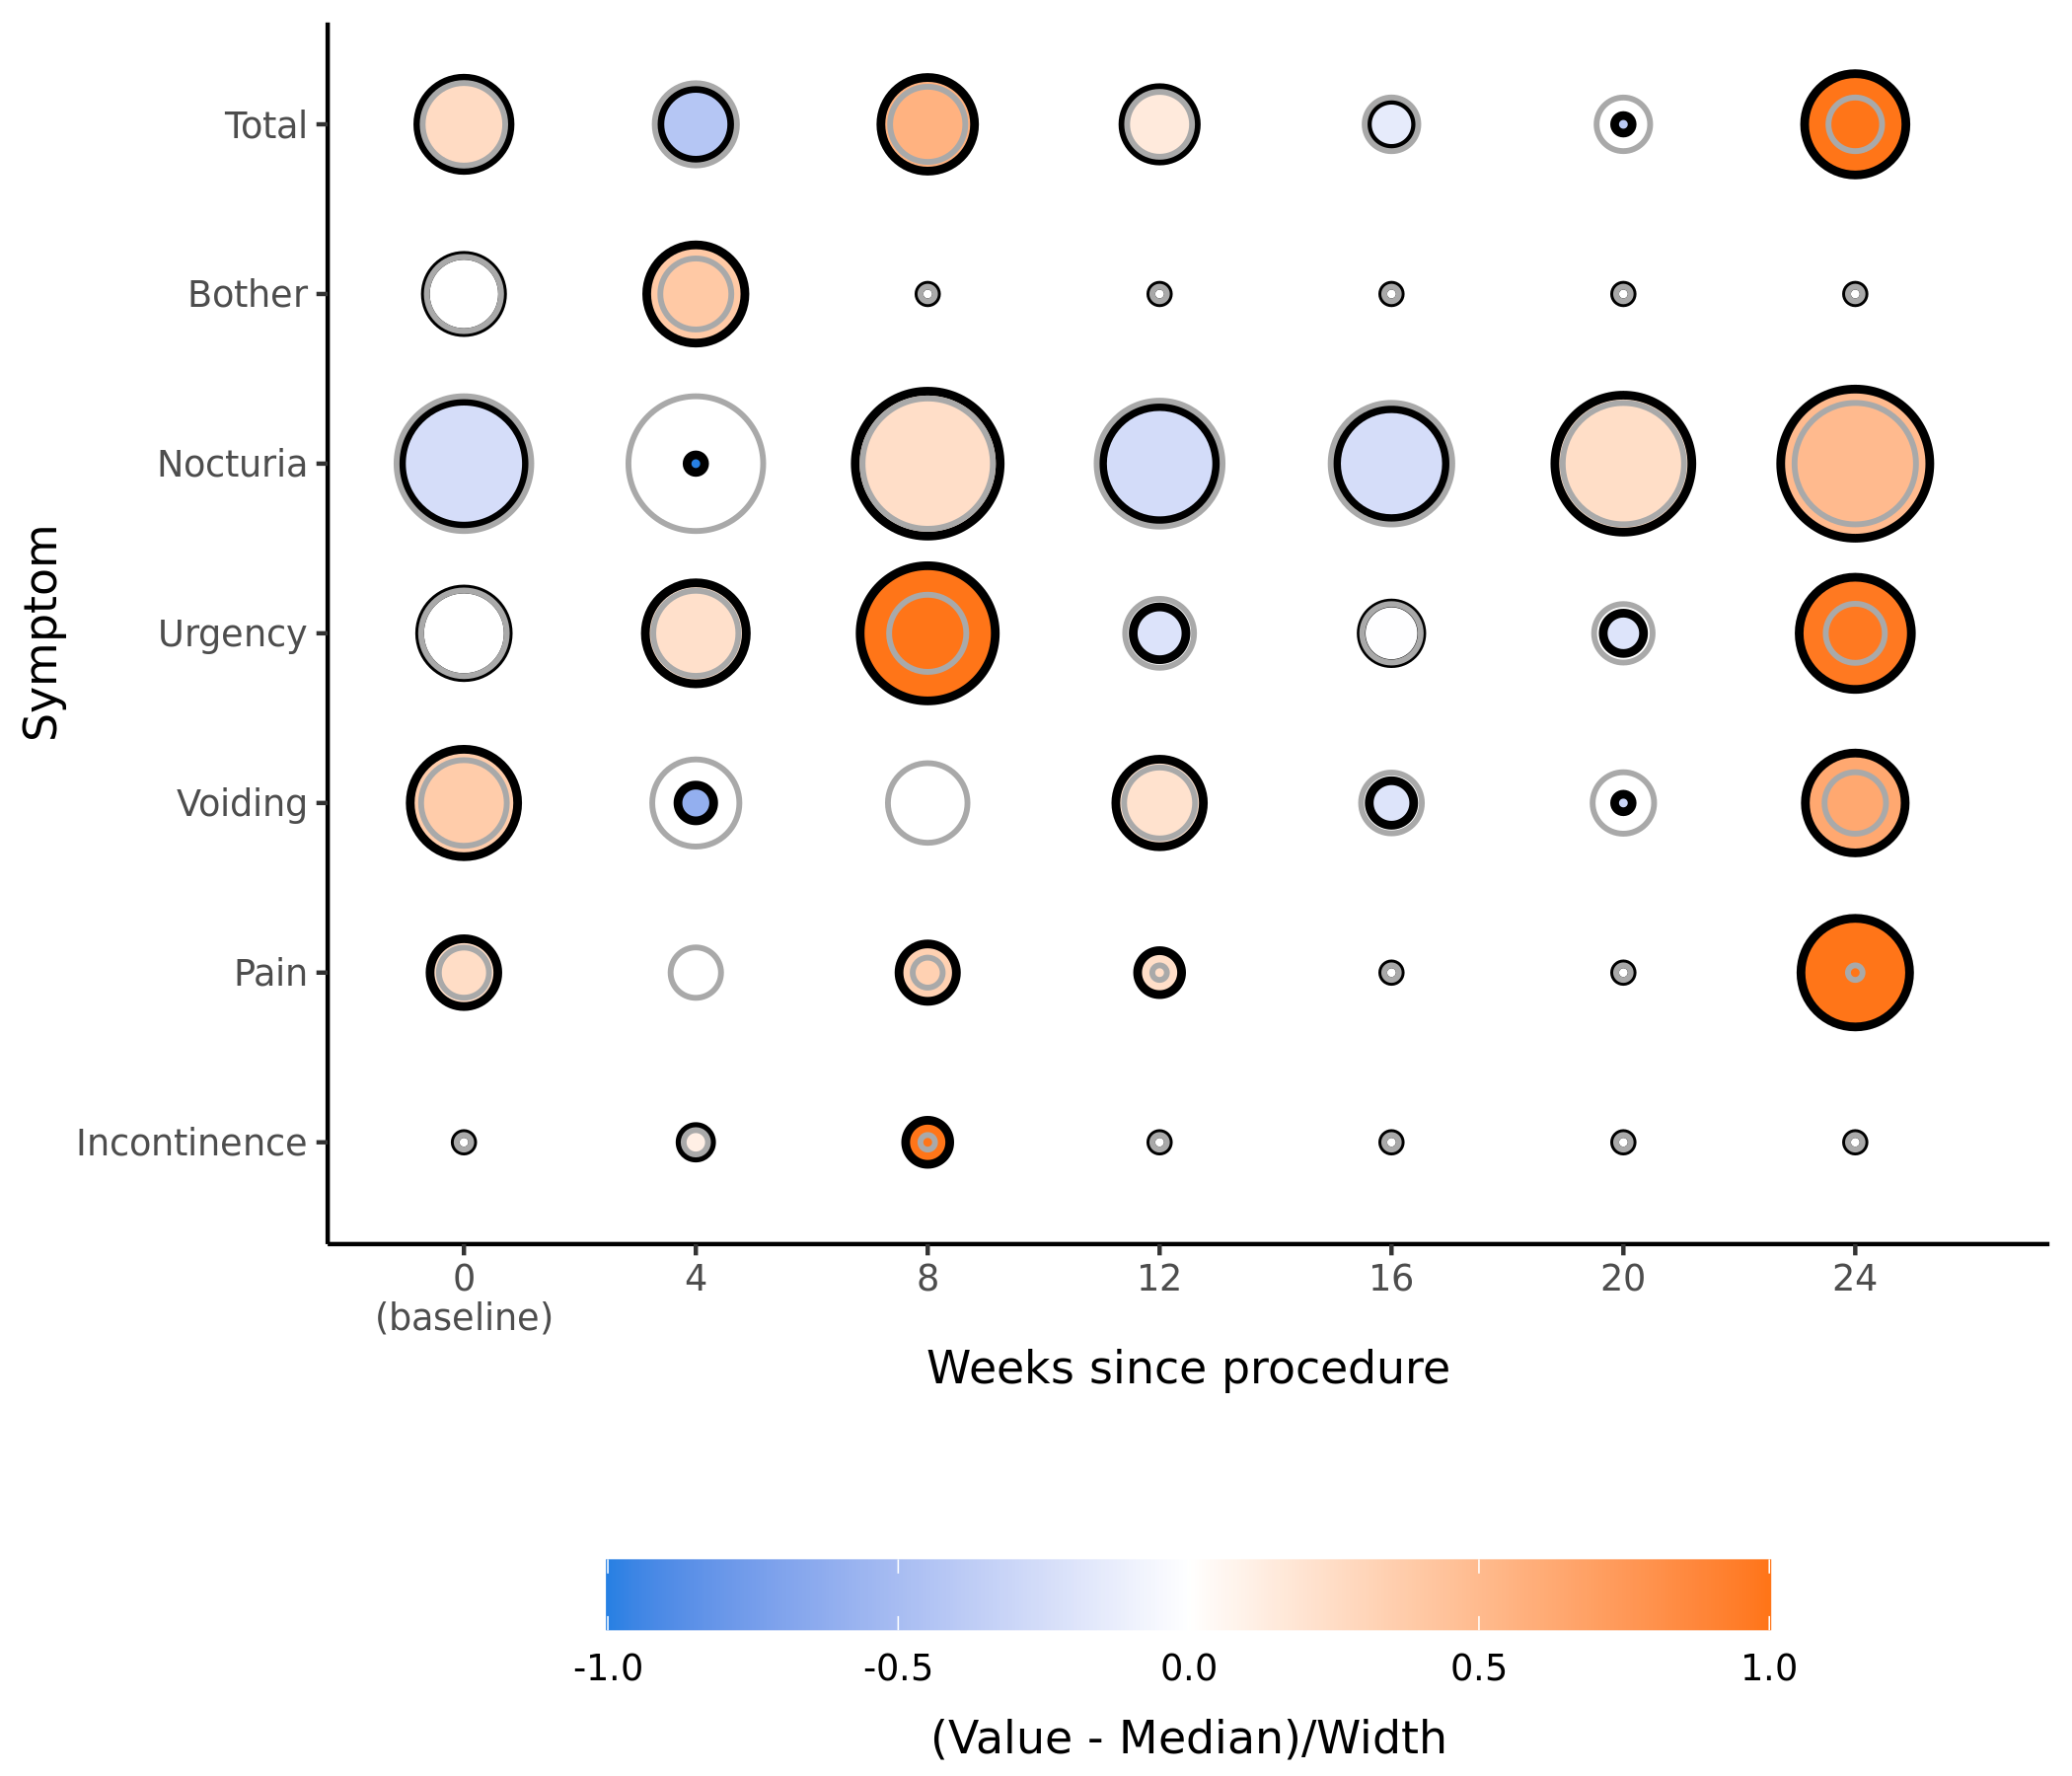

In [25]:
# there may be a more streamlined way to do this, but I don't know it!
median_values <- syn_long_dat %>%
    group_by(Week) %>%
    summarize(across(-c(ID), median, na.rm = TRUE))
median_values_t <- median_values %>%
    pivot_longer(cols = -c(Week),
        names_to = "Symptom",
        values_to = "Median")

Q1_values <- syn_long_dat %>%
    group_by(Week) %>%
    summarize(across(-c(ID), ~ quantile(., 0.16, na.rm = TRUE)))
Q1_values_t <- Q1_values %>%
    pivot_longer(cols = -c(Week),
        names_to = "Symptom",
        values_to = "Q1")

Q3_values <- syn_long_dat %>%
    group_by(Week) %>%
    summarize(across(-c(ID), ~ quantile(., 0.84, na.rm = TRUE)))
Q3_values_t <- Q3_values %>%
    pivot_longer(cols = -c(Week),
        names_to = "Symptom",
        values_to = "Q3")

patient_data <- select(syn_long_dat[syn_long_dat$ID == input_params$patient_id, ], -ID)
patient_data_t <- patient_data %>%
    pivot_longer(cols = -c(Week),
        names_to = "Symptom",
        values_to = "Value")

merged_df <- merge(median_values_t, Q1_values_t, by = c("Week", "Symptom")) %>%
    merge(Q3_values_t, by = c("Week", "Symptom")) %>%
    merge(patient_data_t, by = c("Week", "Symptom"))
    
# Add a row for the full 1sigma width
merged_df$Width <- merged_df$Q3 - merged_df$Q1
# don't allow a Width of zero!
merged_df$Width [merged_df$Width  == 0] <- 1.

# set the symptoms as a factor and in the correct order
merged_df$Symptom <- factor(merged_df$Symptom, levels = symptoms)

# Define a custom color palette
custom_palette <- c("#2780E3", "white", "#ff7518")

breaks <- seq(0, 24, 4)
labels <- c("0\n(baseline)", "4", "8", "12", "16", "20", "24")

ggplot(merged_df, aes(x = Week, y = Symptom, size = Value, fill = (Value - Median)/Width)) +
    geom_point(shape = 21, color = "black", stroke = 1.5) + 
    scale_fill_gradient2(
        low = custom_palette[1], 
        mid = custom_palette[2], 
        high = custom_palette[3],
        midpoint = 0, 
        limits = c(-1, 1),
        oob = scales::squish
    ) +    
    geom_point(aes(size = Median), shape = 1, color = "darkgray", stroke = 1.) +
    # geom_point(aes(size = Q1), shape = 1, color = "gray", stroke = 0.5) +
    # geom_point(aes(size = Q3), shape = 1, color = "gray", stroke = 0.5) +
    scale_size(range = c(1, 16), guide = "none") + 
    scale_x_continuous("Weeks since procedure", breaks = breaks, labels = labels) + 
    expand_limits(x = c(-1, 26)) + 
    theme_classic() + 
    guides(fill = guide_colorbar(title.position = "bottom",
        title.hjust = 0.5,
        title.vjust = 0,
        label.position = "bottom")
    ) +  
    theme(
        legend.position = "bottom",           
        legend.key.width = unit(2, "cm"),
        legend.title.align = 0.5,
        legend.margin = margin(t = 30)
    )   


In [26]:
max(syn_long_dat$Incontinence, na.rm = TRUE)


[1] 50.98492

## Faceted line plot?

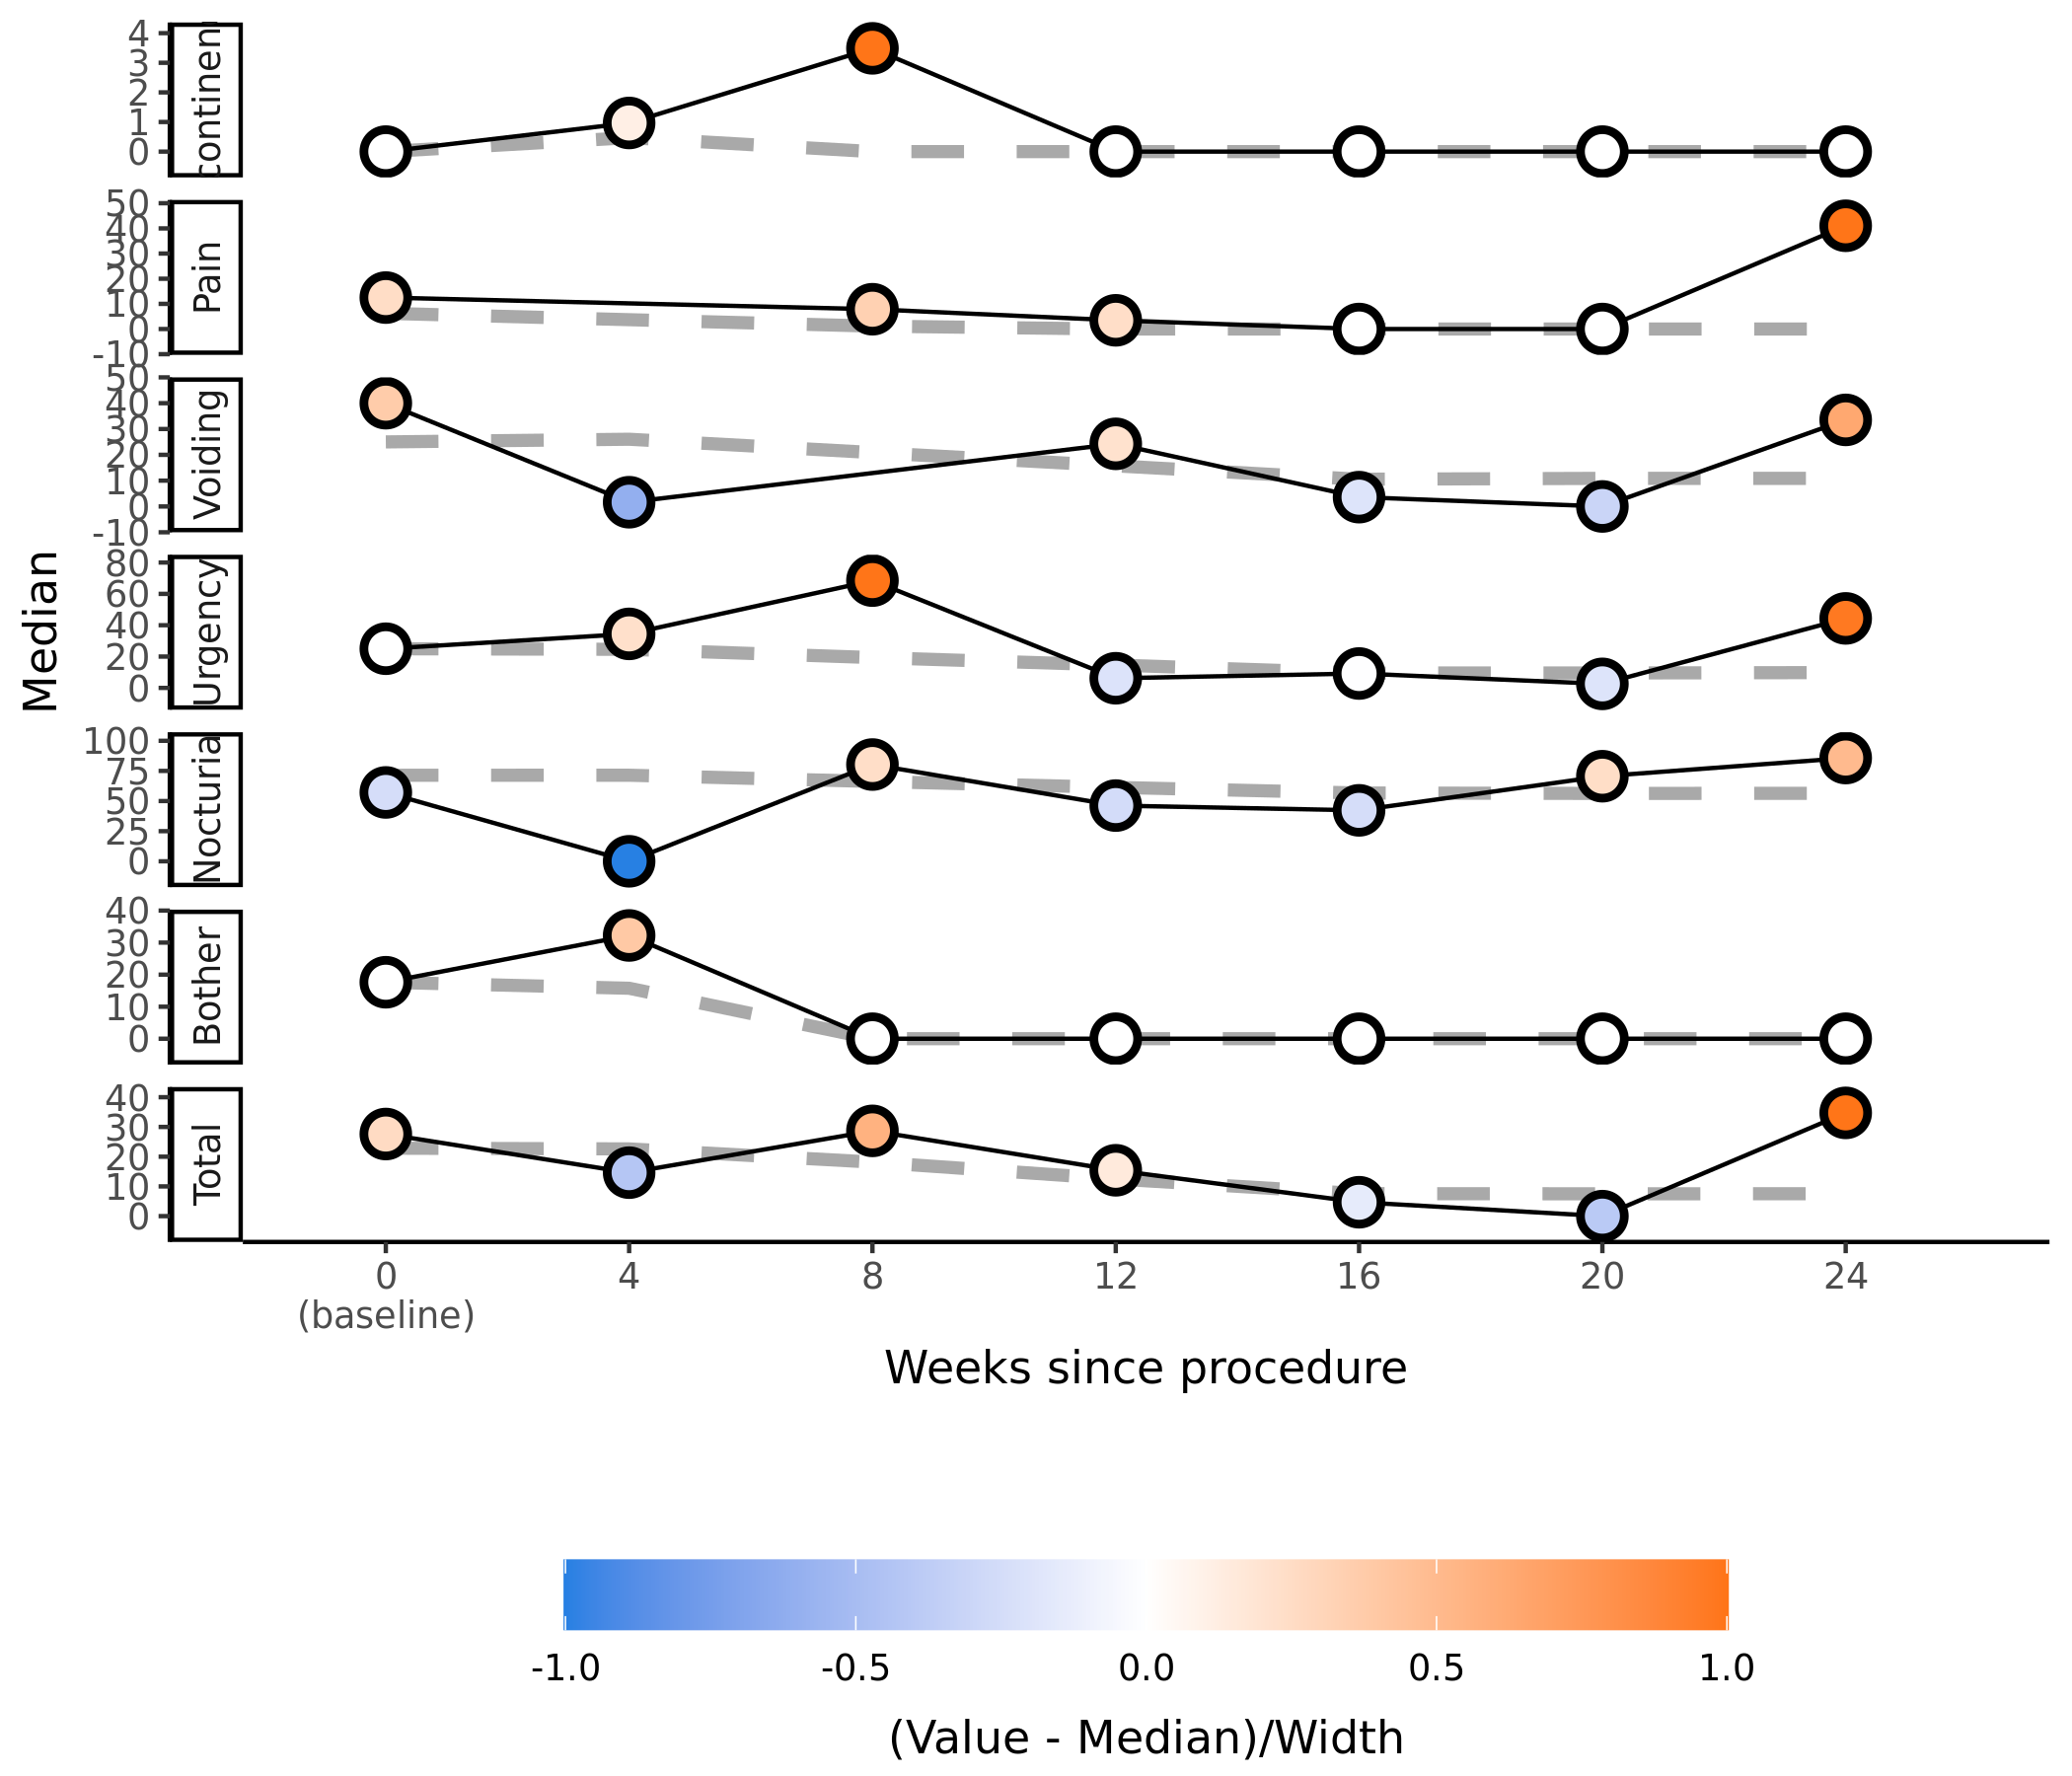

In [27]:
# Create the line plot

# omit the rows with nan values??
merged_df_clean <- na.omit(merged_df)

# custom color palette
custom_palette <- c("#2780E3", "white", "#ff7518")

# for labelling
breaks <- seq(0, 24, 4)
labels <- c("0\n(baseline)", "4", "8", "12", "16", "20", "24")

p <- ggplot(merged_df_clean, aes(x = Week, y = Median)) +
    geom_line(color = "darkgray", linetype = "dashed", size = 1.5) +
    geom_line(aes(y = Value)) +
    geom_point(aes(y = Value, fill = (Value - Median)/Width), shape = 21, color = "black", size = 4, stroke = 1.5) + 
    scale_fill_gradient2(
        low = custom_palette[1], 
        mid = custom_palette[2], 
        high = custom_palette[3],
        midpoint = 0, 
        limits = c(-1, 1),
        oob = scales::squish
    ) +   
    facet_grid(Symptom ~ ., 
        scales = "free_y", 
        switch="both"
    ) + 
    scale_x_continuous("Weeks since procedure", breaks = breaks, labels = labels) + 
    scale_y_continuous(expand = expansion(mult = 0.25)) +
    expand_limits(x = c(-1, 26)) + 
    theme_classic() + 
    guides(fill = guide_colorbar(title.position = "bottom",
        title.hjust = 0.5,
        title.vjust = 0,
        label.position = "bottom")
    ) +  
    theme(
        legend.position = "bottom",           
        legend.key.width = unit(2, "cm"),
        legend.title.align = 0.5,
        legend.margin = margin(t = 30)
    )   
  
p

In [28]:
head(merged_df)

,Week,Symptom,Median,Q1,Q3,Value,Width
,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,Bother,17.62599,0.000000,35.251989,17.62599,35.251989
2,0,Incontinence,0.00000,0.000000,4.166667,0.00000,4.166667
3,0,Nocturia,71.42857,28.571429,85.714286,57.14286,57.142857
4,0,Pain,6.25000,0.000000,25.000000,12.50000,25.000000
5,0,Total,22.85714,15.238095,33.333333,27.61905,18.095238
6,0,Urgency,25.00000,8.333333,50.000000,25.00000,41.666667


In [29]:
# different circles (not great)
# library(ggforce)

# # Your data for x and y coordinates (replace with your actual data)
# x <- c(1, 2, 3, 4, 5)
# y <- c(10, 15, 20, 25, 30)

# # Create a data frame for the points
# df <- data.frame(x = x, y = y)

# # Plot the points with an open circle and dashed line around it
# ggplot(df, aes(x0 = x, y0 = y, r = 4)) +
#   geom_circle(color = "blue", linetype = "dashed") +  # Open circle with a blue color
#   theme_minimal()

## Jamie's new table

In [38]:
    # the questions
    q_vec <- c("Loss of bladder Control",
        "Urine leakage",
        "Urine leakage from laughing, coughing, etc.",
        "Urine leakage during activities",
        "Urine leakage from walking",
        "Urine leakage at night",
        "Pain/discomfort with bladder filling",
        "Pain/discomfort with full bladder", 
        "Pain/discomfort during Urination",
        "Pain/discomfort after urination",
        "Need to push for Urination",
        "Delay in urination",
        "Repeated stops in urine flow",
        "Slow/Weak urine flow",
        "Trickle/dribble after urination",
        "Sudden need to urinate",
        "Sudden need to urinate with potential leakage",
        "How difficult was it to wait more than a few minutes?",
        "Times awakened to urinate per night",
        "Frequency of nights awakened to urinate",
        "Number of daytime urinations",
        "Time between daytime urinations",
        "Strength of nighttime urge to urinate",
        "Constant need to urinate",
        "Bladder not empty after urination",
        "Urine dribble after voiding",
        "Splitting/spraying of urine stream",
        "Bothered from urinary symptoms")


    # create the legend
    legend_dat <- data.frame(t(seq(0, 1, .2)))
    names(legend_dat) <- paste0(seq(0, 100, 20), "%")
    legend <- gt(legend_dat) %>%
        data_color(method = "numeric",
            palette = c("Greys"),
            domain = c(0, 1)) %>%
        fmt_number(pattern = "") %>%
        tab_header(title = "Legend") %>%
        opt_table_font(font = "Helvetica")
    # temp_fname <- tempfile("legend", fileext = ".png")
    # gtsave(legend, temp_fname, expand = 10)

    # select the columns that we care about
    si_29_m_nms <- lurn_si_29_names("male")

    # create a table for this particular patient
    this_patient_row <- syn_week[input_params$patient_row, si_29_m_nms]

    # calculate the frequencies
    si29_prelim_freq_table <- t(apply(syn_week[si_29_m_nms], 2,
        function(x) table(factor(x, levels = 0:4), useNA = "always")))

    si29_prelim_prop_table <- prop.table(si29_prelim_freq_table, margin = 1)

    colnames(si29_prelim_prop_table) <- c("0", "1", "2", "3", "4", "Missing")


    si29_prop_table_v3 <- cbind(`Question: Short description` = q_vec,
                            as.data.frame(si29_prelim_prop_table))

    si29_item_table_v3 <- si29_prop_table_v3 %>%
    gt(rownames_to_stub = TRUE) %>%
    tab_stubhead(label = md("**LURN SI-29 Item**")) %>%
    tab_spanner(
        label = "Response options (0-4): Higher numbers mean higher severity",
        columns = c("0", "1", "2", "3", "4", "Missing")) %>%
    tab_options(table.background.color = "white") %>%
    data_color(
        columns = c("0", "1", "2", "3", "4", "Missing"),
        method = "numeric",
        palette = c("Blues"),
        domain = c(0, 1)) %>%
    fmt_number(
        columns = c("0", "1", "2", "3", "4", "Missing"),
        decimals = 0,
        scale_by = 100,
        pattern = "{x}%") %>%
    fmt_number(
        rows = c(19, 21, 23, 28),
        columns = "4",
        pattern = "") %>%
    fmt_number(
        rows = 24,
        columns = c("2", "3", "4"),
        pattern = "") %>%
    cols_width(
        everything() ~ px(80)) %>%
    cols_width(
        1 ~ px(150)) %>%
    cols_width(
        2 ~ px(300)) %>%
    cols_width(
        8 ~ px(100)) %>%
    tab_header(title = md(
        "**Figure 1: LURN SI-29: Percentages of response values**"),
        subtitle = 
        "Synthetic data: Darker blue corresponds to higher percentages") %>%
    # tab_footnote(html(local_image(temp_fname, height = 75))) %>%
    tab_footnote(footnote = 
        "For items SI29_Q19, SI29_Q21, SI29_Q23, SI29_Q24, and SI29_Q28, blank cells are not possible response values") %>%
    tab_source_note(source_note = paste0("Data are synthetic for testing and simulation purposes. N = ",  length(syn_week$ID))) %>%
    opt_table_font(font = "Helvetica") %>%
    tab_row_group(label = md("**Section F: Additional symptoms and bother**"),
                    rows = c("SI29_Q21", "SI29_Q22", "SI29_Q23", "SI29_Q24",
                            "SI29_Q25", "SI29_Q26", "SI29_Q27b",
                            "SI29_Q28")) %>%
    tab_row_group(label = md("**Section E: Nocturia**"),
                    rows = c("SI29_Q19", "SI29_Q20")) %>% 
    tab_row_group(label = md("**Section D: Urgency**"),
                    rows = c("SI29_Q16", "SI29_Q17", "SI29_Q18")) %>%
    tab_row_group(label = md("**Section C: Voiding difficulty**"),
                    rows = c("SI29_Q11", "SI29_Q12", "SI29_Q13",
                            "SI29_Q14", "SI29_Q15")) %>%
    tab_row_group(label = md("**Section B: Pain**"),
                    rows = c("SI29_Q7", "SI29_Q8", "SI29_Q9", "SI29_Q10")) %>%
    tab_row_group(label = md("**Section A: Incontinence**"),
                    rows = c("SI29_Q1", "SI29_Q2", "SI29_Q3",
                            "SI29_Q4", "SI29_Q5", "SI29_Q6")) %>%
    cols_label(`Question: Short description` = 
                md("**Question: Short description**"))

In [39]:
syn_week_dat[syn_week_dat$ID == 100, ]

,ID,Week,Bother,Nocturia,Urgency,Voiding,Pain,Incontinence,Total
,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
313,100,16,0,42.28371,9.190623,3.603519,0,0,4.678142


In [40]:
syn_long <- read.csv("../data/syn_long.csv", header = TRUE)
syn_long_dat[syn_long_dat$Week == 12, ]

,ID,Week,Bother,Nocturia,Urgency,Voiding,Pain,Incontinence,Total
,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4,3,12,0,60.70400,0.000000,23.7467189,13.888180,0.00000,13.852060
11,5,12,0,76.80145,32.205870,47.5577729,21.230432,0.00000,27.677336
18,6,12,0,60.52078,22.999463,0.6893121,0.000000,0.00000,9.185733
25,7,12,0,91.86377,40.190237,21.8151321,0.000000,0.00000,19.304403
32,9,12,0,48.33351,0.000000,15.0020004,6.720510,0.00000,10.638079
39,11,12,NA,62.54371,14.336794,0.0000000,0.000000,14.76931,12.744468
46,17,12,0,75.39141,23.190050,35.7728997,0.000000,0.00000,21.194501
53,20,12,0,49.12035,15.486551,31.6783862,1.607866,0.00000,18.502724
60,21,12,0,60.50129,0.000000,30.0146060,15.786143,0.00000,18.423745


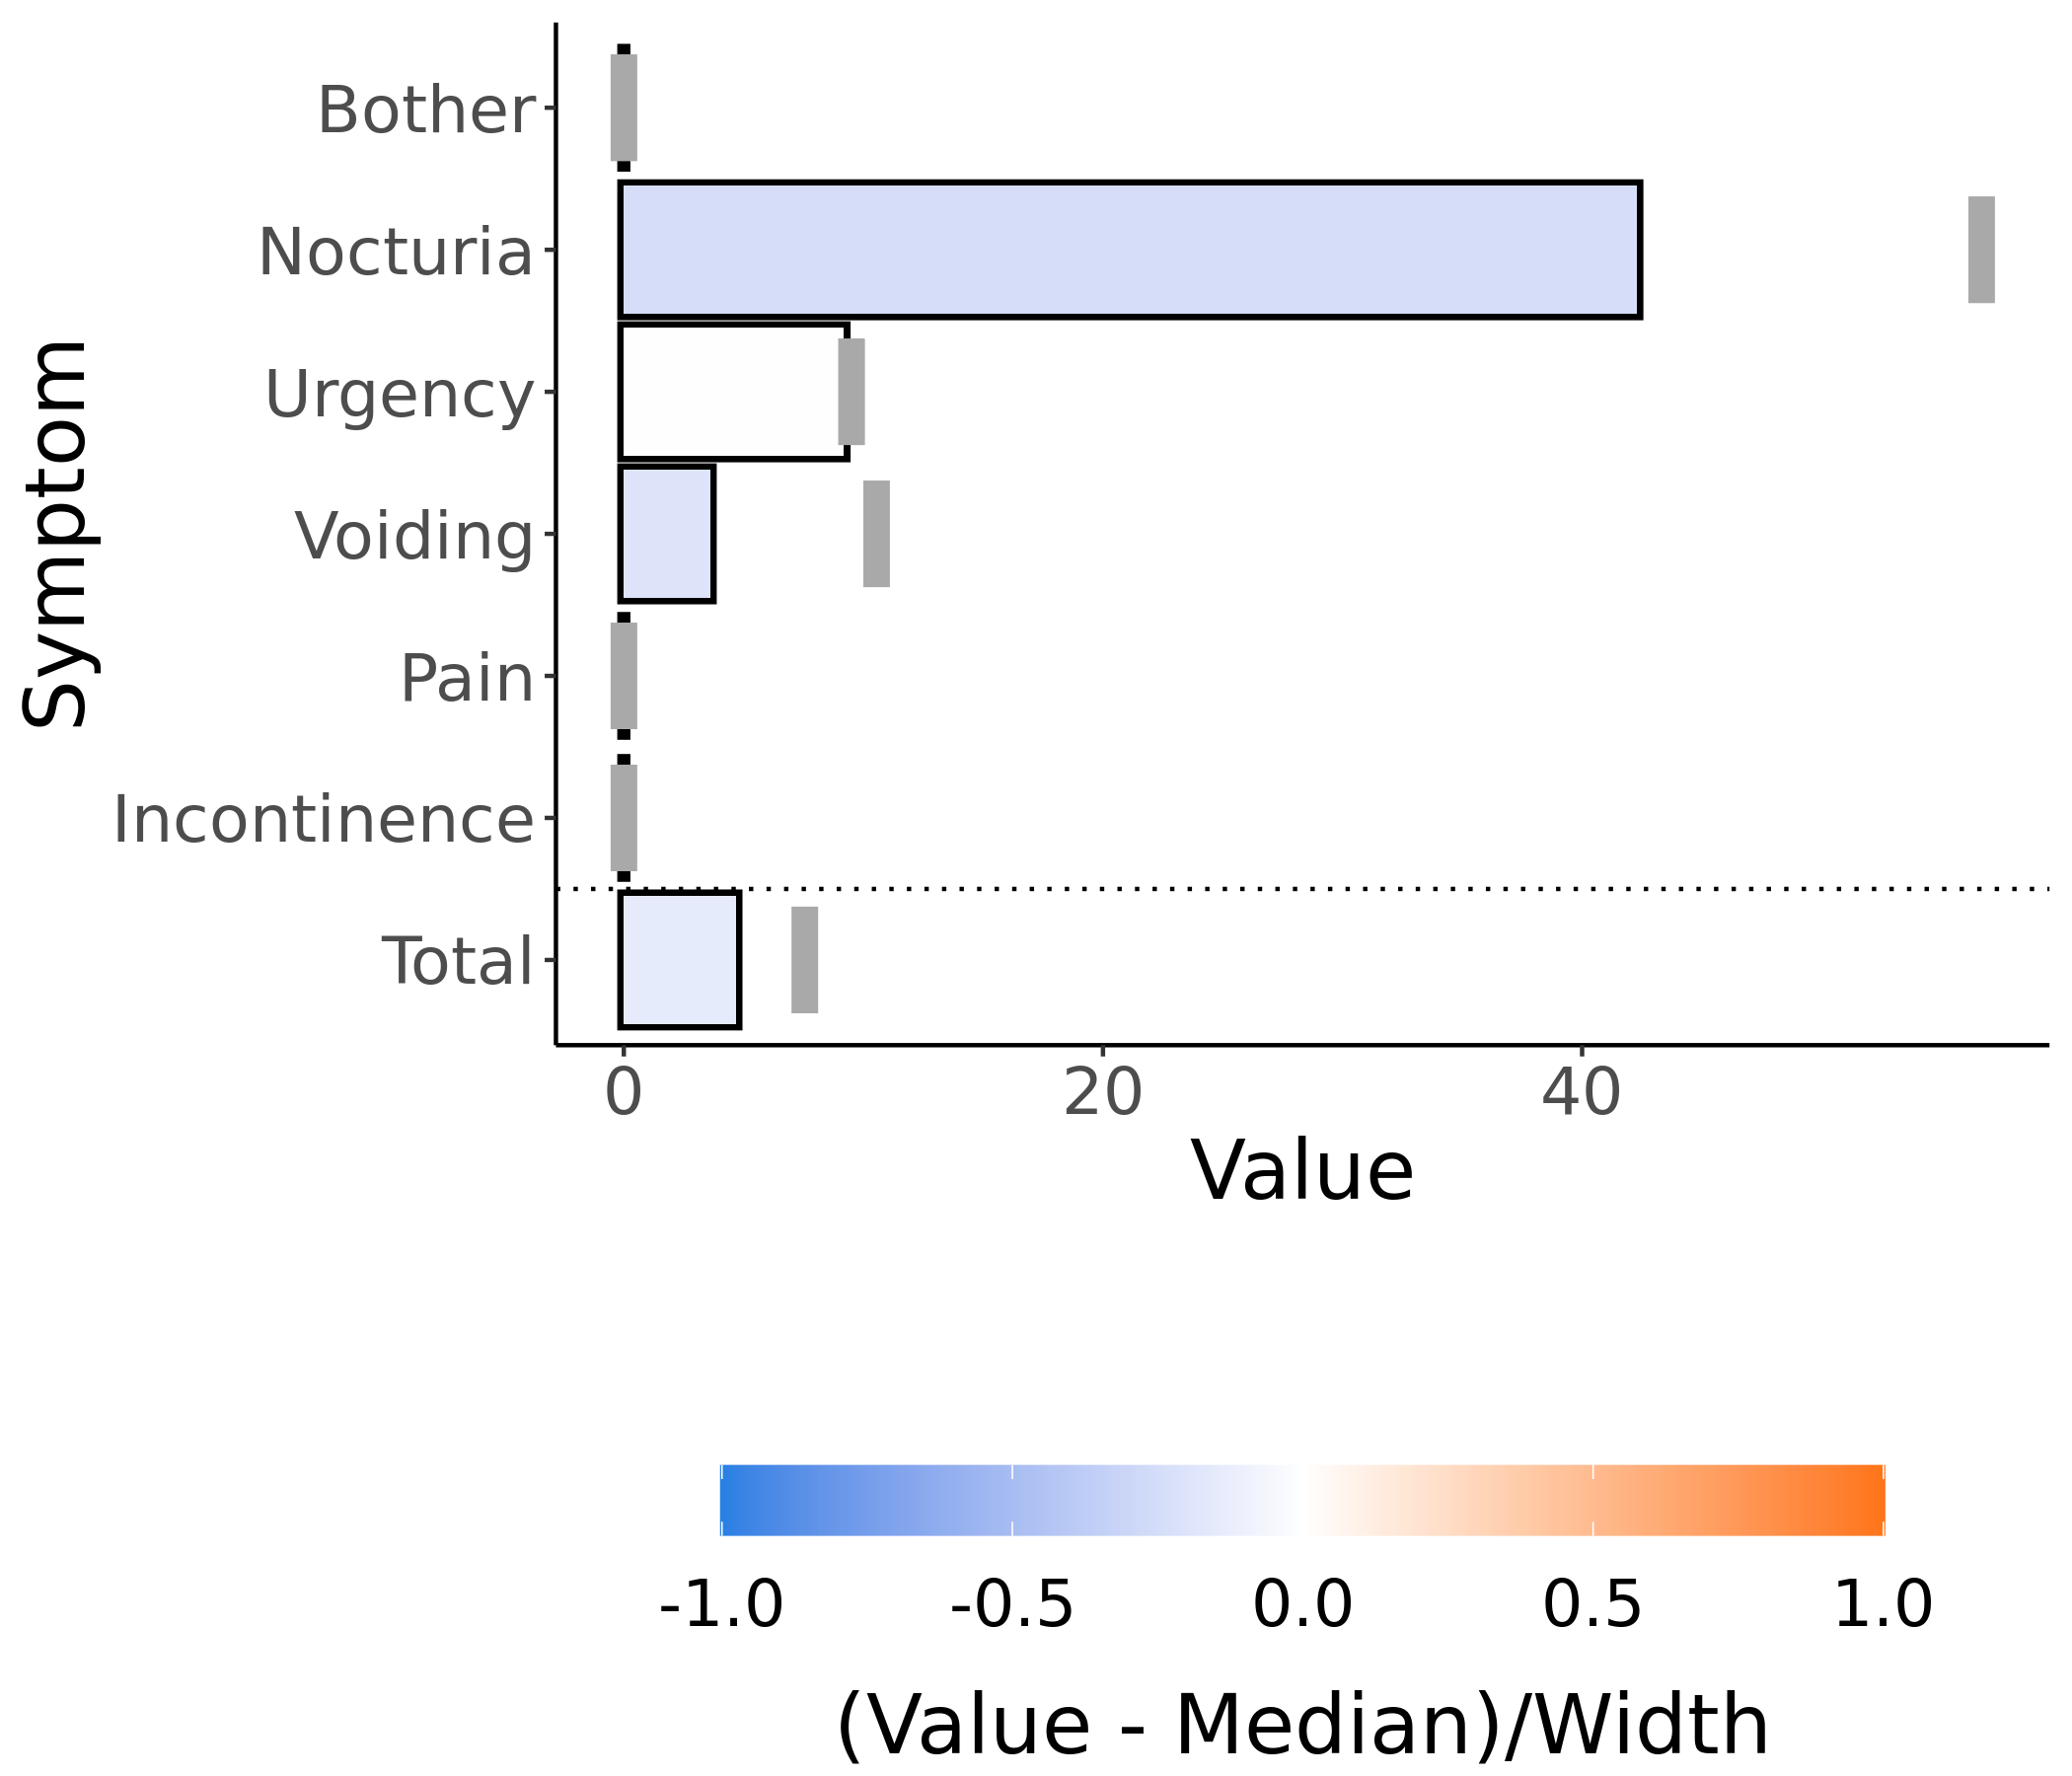

In [41]:
patient_id <- 100
patient_week <- 16



# for renaming columns
splom_vars <- c(
   "lurn_si_29_total_score", 
   "lurn_si_29_incontinence_score",
   "lurn_si_29_pain_score", 
   "lurn_si_29_voiding_score",
   "lurn_si_29_urgency_score", 
   "lurn_si_29_nocturia_score",
   "lurn_si_29_bother")
symptoms <- c("Total", 
    "Incontinence", 
    "Pain", 
    "Voiding", 
    "Urgency", 
    "Nocturia", 
    "Bother"
)
splom_vars <- rev(splom_vars)
symptoms <- rev(symptoms)


# read in the time series file
syn_long <- read.csv("../data/syn_long.csv", header = TRUE)
patient_cells <- list()
syn_long$ID <- factor(syn_long$ID)
syn_long_dat <- syn_long[c("ID", "Week", splom_vars)]
names(syn_long_dat)<- append(c("ID", "Week"), symptoms)

# grab the appropriate week for the current symptoms plot
syn_week <- syn_long[syn_long$Week == patient_week, ]
syn_week_dat <- syn_long_dat[syn_long_dat$Week == patient_week, ]

input_params <- list(
    patient_id = patient_id, 
    patient_week = patient_week, 
    patient_row = which(syn_week_dat$ID == patient_id)[1]
)


# create a summary for each of the columns for all patients as a comparison
    df <- select(syn_week_dat, -c(ID, Week))
    summary_df <- data.frame(
        Median = apply(df, 2, median, na.rm = TRUE),
        Percentile_16 = apply(df, 2, function(x) quantile(x, probs = 0.16, na.rm = TRUE)),
        Percentile_84 = apply(df, 2, function(x) quantile(x, probs = 0.84, na.rm = TRUE))
    )

    # Add a row for the full 1sigma width
    summary_df$Width <- summary_df$Percentile_84 - summary_df$Percentile_16

    # what should we do if width == 0??
    summary_df$Width[summary_df$Width == 0] <- 1.

    # add the symptoms in the correct order
    summary_df$Symptom <- factor(rownames(summary_df), levels = symptoms)

    # get the patient data for the bar chart
    df_patient <- select(syn_week_dat[input_params$patient_row, ], -c(ID, Week))
    p <- as.data.frame(t(df_patient))
    summary_df$Value <- p[, 1]

    # Define a custom color palette
    custom_palette <- c("#2780E3", "white", "#ff7518")

    g <- ggplot(summary_df, aes(x = Symptom, y = Value, fill = (Value - Median)/Width)) +
        scale_x_discrete(limits = rev(levels(summary_df$Symptom))) +
        geom_bar(stat = "identity", fill = "white", color = "black", size = 1.5) + 
        geom_bar(stat = "identity") + 
        scale_fill_gradient2(
            low = custom_palette[1], 
            mid = custom_palette[2], 
            high = custom_palette[3],
            midpoint = 0, 
            limits = c(-1,1),
            oob = scales::squish
        ) +    
        #geom_errorbar(data = summary_df, aes(y = NULL, ymin = Percentile_16, ymax = Percentile_84), width = 0.2, color = "black") +
        geom_errorbar(data = summary_df, aes(y = NULL, ymin = Median, ymax = Median), width = 0.75, color = "darkgray", size = 3) +
        # geom_point(data = summary_df, aes(y = Median), size = 3, color = "black") + 
        geom_vline(xintercept = 1.5, linetype = "dotted") + 
        coord_flip() + 
        theme_classic() + 
        guides(fill = guide_colorbar(title.position = "bottom",
            title.hjust = 0.5,
            title.vjust = 0,
            label.position = "bottom")
        ) +  
        theme(
            legend.position = "bottom",           
            legend.key.width = unit(2, "cm"),
            legend.title.align = 0.5,
            legend.margin = margin(t = 50),
            text = element_text(size = 20),
        )    
g

In [42]:
summary_df

,Median,Percentile_16,Percentile_84,Width,Symptom,Value
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
Bother,0.000000,0.00000,0.000000,1.000000,Bother,0.000000
Nocturia,56.674344,14.37294,72.080476,57.707537,Nocturia,42.283706
Urgency,9.504474,0.00000,35.862260,35.862260,Urgency,9.190623
Voiding,10.548576,0.00000,34.670593,34.670593,Voiding,3.603519
Pain,0.000000,0.00000,9.081388,9.081388,Pain,0.000000
Incontinence,0.000000,0.00000,0.000000,1.000000,Incontinence,0.000000
Total,7.557939,0.00000,19.058525,19.058525,Total,4.678142


In [43]:
df_patient

,Bother,Nocturia,Urgency,Voiding,Pain,Incontinence,Total
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
313,0,42.28371,9.190623,3.603519,0,0,4.678142


# Combined line and bar chart

## time series on right

Warning message in min(x, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in min(x, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”


Warning message:
“Removed 1 rows containing missing values (`position_stack()`).”
Warning message:
“Removed 1 rows containing missing values (`position_stack()`).”


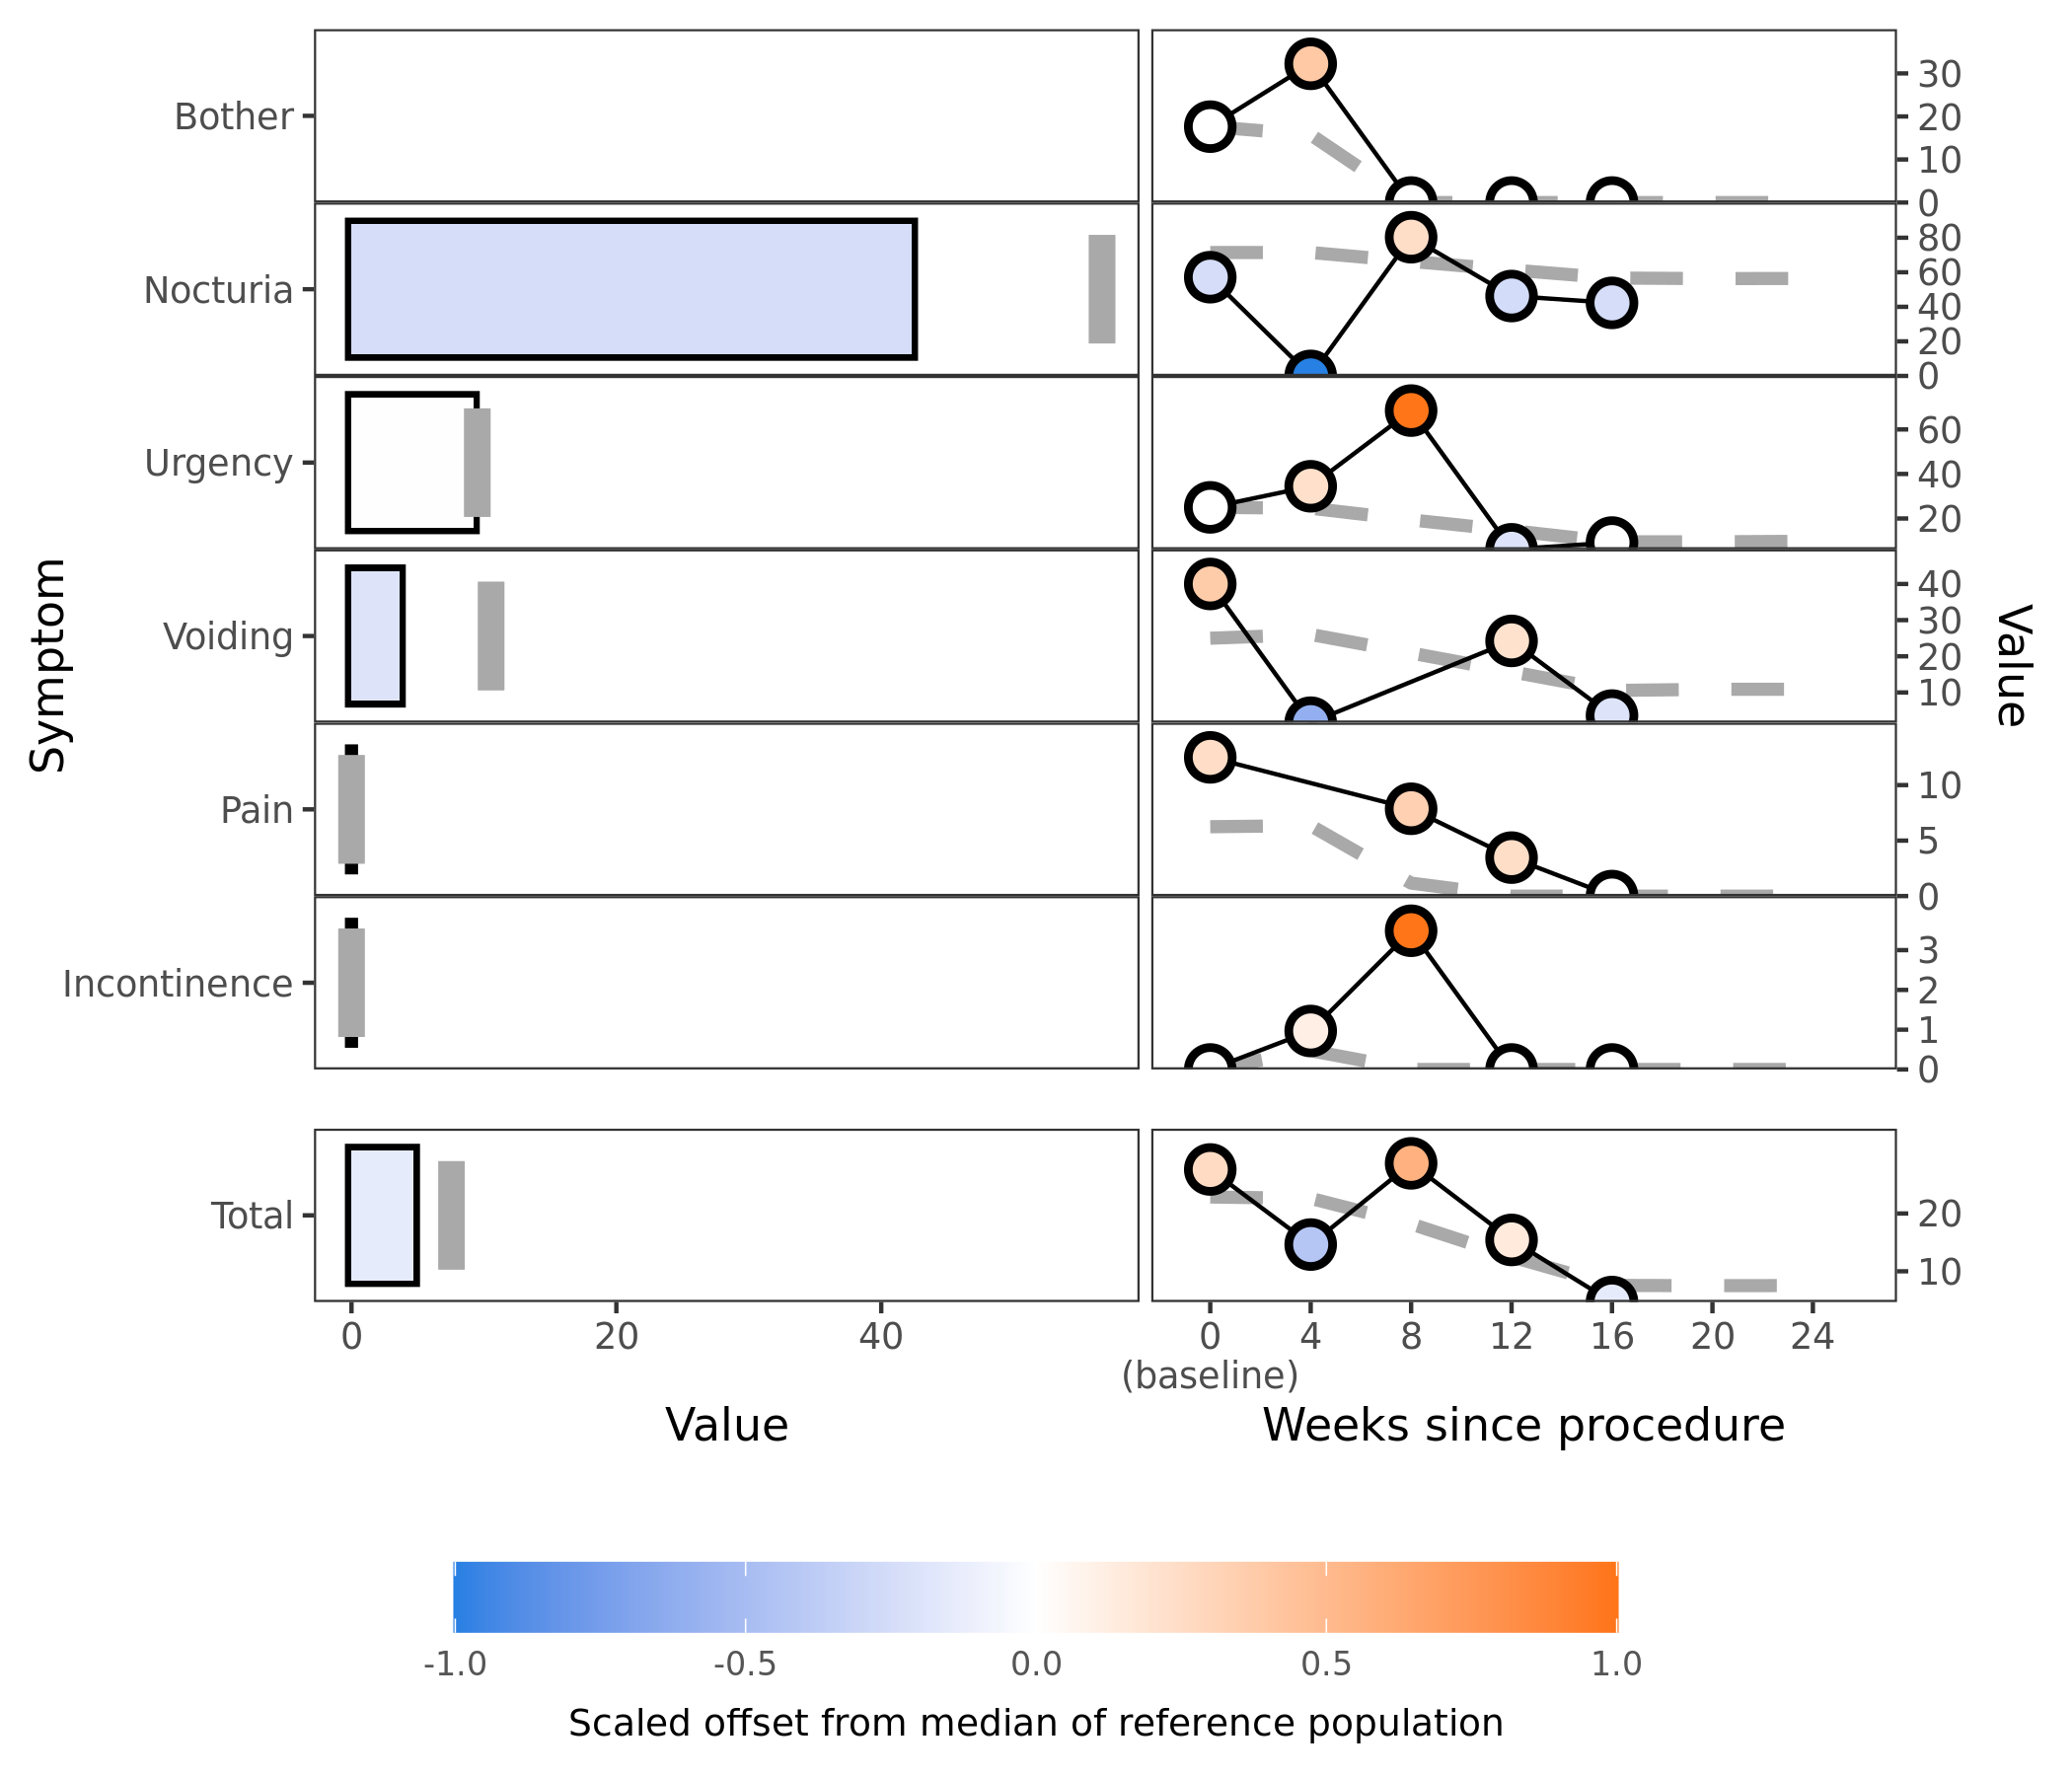

In [365]:
create_current_week_summary_bar_chart <- function(){

    # create a summary for each of the columns for all patients as a comparison
    df <- select(syn_week_dat, -c(ID, Week))
    summary_df <- data.frame(
        Median = apply(df, 2, median, na.rm = TRUE),
        Percentile_16 = apply(df, 2, function(x) quantile(x, probs = 0.16, na.rm = TRUE)),
        Percentile_84 = apply(df, 2, function(x) quantile(x, probs = 0.84, na.rm = TRUE))
    )

    # Add a row for the full 1sigma width
    summary_df$Width <- summary_df$Percentile_84 - summary_df$Percentile_16

    # what should we do if width == 0??
    summary_df$Width[summary_df$Width == 0] <- 1.

    # add the symptoms in the correct order
    summary_df$Symptom <- factor(rownames(summary_df), levels = symptoms)

    # get the patient data for the bar chart
    df_patient <- select(syn_week_dat[input_params$patient_row, ], -c(ID, Week))
    p <- as.data.frame(t(df_patient))
    summary_df$Value <- p[, 1]

    # Define a custom color palette
    custom_palette <- c("#2780E3", "white", "#ff7518")

    # for labelling (so that I can match the size of the other plot)
    breaks <- seq(0, 100, 20)
    labels <- c("0\n", "20", "40", "60", "80", "100")

    # separate the Total
    panel_spacing <- rep(0, length(symptoms) - 1)
    panel_spacing[length(panel_spacing)] <- 1

    g <- ggplot(summary_df, aes(x = Symptom, y = Value, fill = (Value - Median)/Width)) +
        # scale_x_discrete(limits = rev(levels(summary_df$Symptom))) +
        scale_y_continuous("Symptom level", breaks = breaks, labels = labels) +
        geom_bar(stat = "identity", fill = "white", color = "black", size = 1.5) + 
        geom_bar(stat = "identity") + 
        scale_fill_gradient2(
            low = custom_palette[1], 
            mid = custom_palette[2], 
            high = custom_palette[3],
            midpoint = 0, 
            limits = c(-1,1),
            oob = scales::squish
        ) +    
        geom_errorbar(aes(y = NULL, ymin = Median, ymax = Median), width = 0.75, color = "darkgray", size = 3) +
        # geom_vline(xintercept = 0.4) + 
        # geom_vline(xintercept = 1.6) + 
        facet_grid(Symptom ~ ., 
            scales = "free_y", 
            switch = "both",
        ) + 
        coord_flip() + 
        guides(fill = FALSE) +
        theme_bw() +
        theme(
            panel.spacing = unit(panel_spacing, "lines"),
            strip.text = element_text(size = 0, margin = margin(0,0,0,0)),
            plot.margin = margin(0.25, 0, 0.25, 0.25, "cm"),
            panel.grid.major = element_blank(), 
            panel.grid.minor = element_blank(),
        )


    return(g)
}

create_time_series_line_plot <- function(){

    # there may be a more streamlined way to do this, but I don't know it!
    median_values <- syn_long_dat %>%
        group_by(Week) %>%
        summarize(across(-c(ID), median, na.rm = TRUE))
    median_values_t <- median_values %>%
        pivot_longer(cols = -c(Week),
            names_to = "Symptom",
            values_to = "Median")

    Q1_values <- syn_long_dat %>%
        group_by(Week) %>%
        summarize(across(-c(ID), ~ quantile(., 0.16, na.rm = TRUE)))
    Q1_values_t <- Q1_values %>%
        pivot_longer(cols = -c(Week),
            names_to = "Symptom",
            values_to = "Q1")

    Q3_values <- syn_long_dat %>%
        group_by(Week) %>%
        summarize(across(-c(ID), ~ quantile(., 0.84, na.rm = TRUE)))
    Q3_values_t <- Q3_values %>%
        pivot_longer(cols = -c(Week),
            names_to = "Symptom",
            values_to = "Q3")

    patient_data <- select(syn_long_dat[syn_long_dat$ID == input_params$patient_id, ], -ID)
    patient_data_t <- patient_data %>%
        pivot_longer(cols = -c(Week),
            names_to = "Symptom",
            values_to = "Value")

    merged_df <- merge(median_values_t, Q1_values_t, by = c("Week", "Symptom")) %>%
        merge(Q3_values_t, by = c("Week", "Symptom")) %>%
        merge(patient_data_t, by = c("Week", "Symptom"))
        

    # Add a row for the full 1sigma width
    merged_df$Width <- merged_df$Q3 - merged_df$Q1
    # what should I do with width == 0 ??!!
    merged_df$Width[merged_df$Width == 0] <- 1.

    # set the symptoms as a factor and in the correct order
    merged_df$Symptom <- factor(merged_df$Symptom, levels = symptoms)

    # omit the rows with nan values??
    merged_df_clean_limit_week <- na.omit(merged_df[merged_df$Week <= input_params$patient_week, ])

    # custom color palette
    custom_palette <- c("#2780E3", "white", "#ff7518")

    # for labelling
    breaks <- seq(0, 24, 4)
    labels <- c("0\n(baseline)", "4", "8", "12", "16", "20", "24")

    # function to calculate custom breaks
    custom_breaks <- function(data, n_breaks = 4, tol = 0.5) {
        # Calculate breaks based on data range
        min_value <- min(data)
        max_value <- max(data)
        breaks <- pretty(c(min_value, max_value), n = n_breaks)
        diff <- breaks[2] - breaks[1]
        top_diff <- max_value - breaks[length(breaks)]
        if (abs(top_diff/diff) > tol) {
            breaks <- breaks[1:(length(breaks) - 1)]
            if (top_diff < 0){
                breaks <- breaks[1:(length(breaks) - 1)]
            }
        }
        return(breaks)
    }

    # separate the Total
    panel_spacing <- rep(0, length(symptoms) - 1)
    panel_spacing[length(panel_spacing)] <- 1

    g <- ggplot(merged_df, aes(x = Week, y = Median)) +
        geom_line(color = "darkgray", linetype = "dashed", size = 1.5) +
        geom_line(data = merged_df_clean_limit_week, aes(y = Value)) +
        geom_point(data = merged_df_clean_limit_week, aes(y = Value, fill = (Value - Median)/Width), shape = 21, color = "black", size = 4, stroke = 1.5) + 
        scale_fill_gradient2(
            low = custom_palette[1], 
            mid = custom_palette[2], 
            high = custom_palette[3],
            midpoint = 0, 
            limits = c(-1, 1),
            oob = scales::squish
        ) +   
        # geom_hline(yintercept = 0) + 
        facet_grid(Symptom ~ ., 
            scales = "free_y", 
            switch = "both",
        ) + 
        scale_x_continuous("Weeks since procedure", breaks = breaks, labels = labels) + 
        scale_y_continuous("Symptom level", expand = expansion(mult = c(0, 0.25)),
            breaks = function(x) {
                return(custom_breaks(x))
            },
            position = "right"
        ) +
        expand_limits(x = c(-1, 26)) + 
        ylab("") + 
        # theme_void() + 
        guides(fill = FALSE) +
        theme_bw() + 
        theme(
            strip.text = element_text(size = 0, margin = margin(0,0,0,0)),
            plot.margin = margin(0.25, 0.25, 0.25, 0.1, "cm"),
            panel.spacing = unit(panel_spacing, "lines"),
            panel.grid.major = element_blank(), 
            panel.grid.minor = element_blank(),
            axis.title.y.right = element_text(margin = margin(l = 10))

        )  

    # create another plot just for the legend (not sure there's a simpler way to do this!)
    g_legend <- ggplot(merged_df, aes(x = Week, y = Median)) +
        geom_line(color = "darkgray", linetype = "dashed", size = 1.5) +
        geom_line(data = merged_df_clean_limit_week, aes(y = Value)) +
        geom_point(data = merged_df_clean_limit_week, aes(y = Value, fill = (Value - Median)/Width), shape = 21, color = "black", size = 4, stroke = 1.5) + 
        scale_fill_gradient2(
            low = custom_palette[1], 
            mid = custom_palette[2], 
            high = custom_palette[3],
            midpoint = 0, 
            limits = c(-1, 1),
            oob = scales::squish
        ) +    
         guides(
            fill = guide_colorbar(
                title = "Scaled offset from median of reference population",
                title.position = "bottom",
                title.hjust = 0.5,
                title.vjust = 0,
                label.position = "bottom"
            )
        ) + 
        theme_bw() + 
        theme(
            legend.position = "bottom",           
            legend.key.width = unit(2, "cm"),
            legend.title.align = 0.5,
            legend.margin = margin(margin(10,0,0,0,"cm")),
            legend.title = element_text(size = 9), 
            legend.text = element_text(size = 8, color = "#555555")
        )   


    legend <- cowplot::get_legend(g_legend)
    

    return(
        list(
            "plot" = g,
            "legend" = legend
        )
    )
}

patient_id <- 100
patient_week <- 16
input_params <- list(
    patient_id = patient_id, 
    patient_week = patient_week, 
    patient_row = which(syn_week_dat$ID == patient_id)[1]
)

syn_week_dat$Bother <- rescale_to_range(syn_week_dat$Bother, 0, 100)
syn_long_dat$Bother <- rescale_to_range(syn_long_dat$Bother, 0, 100)

bar_chart <- create_current_week_summary_bar_chart()
line_plot <- create_time_series_line_plot()

g <- plot_grid(bar_chart, line_plot$plot, ncol = 2, align = "h", rel_widths = c(0.55,0.45), axis = "l")
plot_grid(g, line_plot$legend, ncol = 1, rel_heights = c(1, 0.2))

## time series on left

Warning message in min(x, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in min(x, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”


Warning message:
“Removed 1 rows containing missing values (`position_stack()`).”
Warning message:
“Removed 1 rows containing missing values (`position_stack()`).”


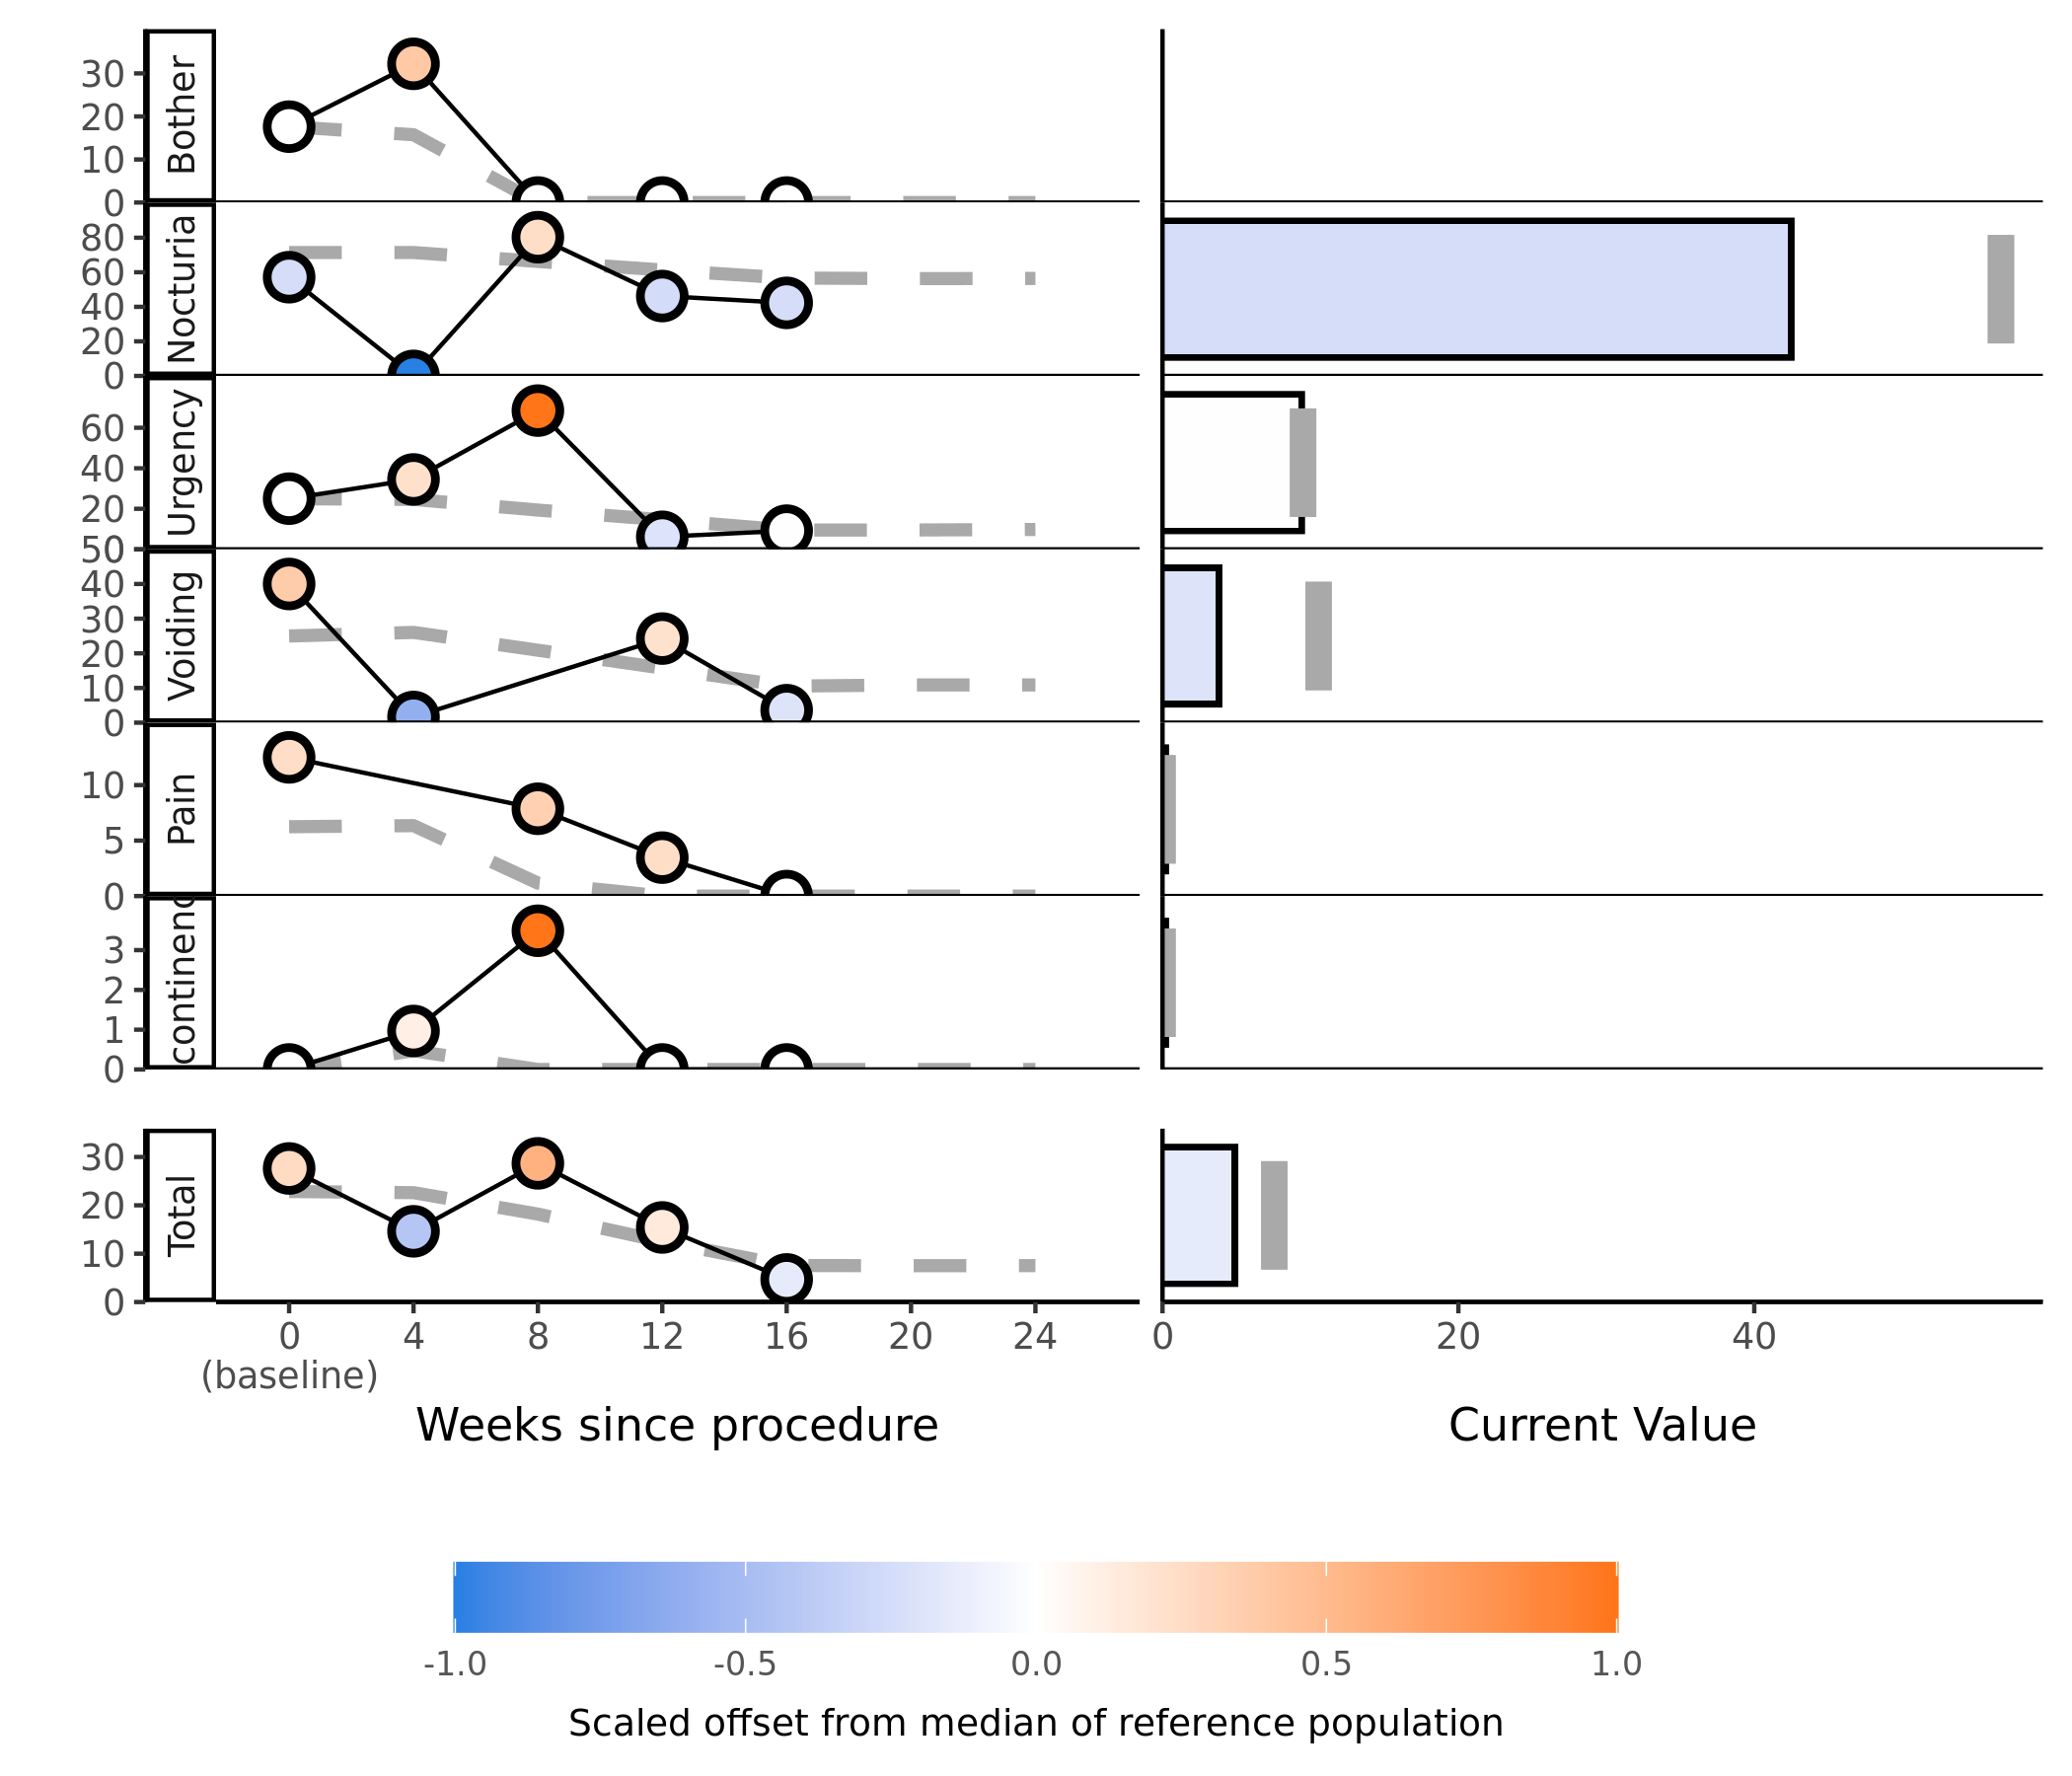

In [337]:
create_current_week_summary_bar_chart <- function(){

    # create a summary for each of the columns for all patients as a comparison
    df <- select(syn_week_dat, -c(ID, Week))
    summary_df <- data.frame(
        Median = apply(df, 2, median, na.rm = TRUE),
        Percentile_16 = apply(df, 2, function(x) quantile(x, probs = 0.16, na.rm = TRUE)),
        Percentile_84 = apply(df, 2, function(x) quantile(x, probs = 0.84, na.rm = TRUE))
    )

    # Add a row for the full 1sigma width
    summary_df$Width <- summary_df$Percentile_84 - summary_df$Percentile_16

    # what should we do if width == 0??
    summary_df$Width[summary_df$Width == 0] <- 1.

    # add the symptoms in the correct order
    summary_df$Symptom <- factor(rownames(summary_df), levels = symptoms)

    # get the patient data for the bar chart
    df_patient <- select(syn_week_dat[input_params$patient_row, ], -c(ID, Week))
    p <- as.data.frame(t(df_patient))
    summary_df$Value <- p[, 1]

    # Define a custom color palette
    custom_palette <- c("#2780E3", "white", "#ff7518")

    # for labelling (so that I can match the size of the other plot)
    breaks <- seq(0, 100, 20)
    labels <- c("0\n", "20", "40", "60", "80", "100")

    # separate the Total
    panel_spacing <- rep(0, length(symptoms) - 1)
    panel_spacing[length(panel_spacing)] <- 1

    g <- ggplot(summary_df, aes(x = Symptom, y = Value, fill = (Value - Median)/Width)) +
        # scale_x_discrete(limits = rev(levels(summary_df$Symptom)), labels = rep("", length(symptoms))) +
        scale_y_continuous("Current Value", breaks = breaks, labels = labels, expand = expansion(mult = c(0, 0.05))) +
        geom_bar(stat = "identity", fill = "white", color = "black", size = 1.5) + 
        geom_bar(stat = "identity") + 
        scale_fill_gradient2(
            low = custom_palette[1], 
            mid = custom_palette[2], 
            high = custom_palette[3],
            midpoint = 0, 
            limits = c(-1,1),
            oob = scales::squish
        ) +    
        geom_errorbar(aes(y = NULL, ymin = Median, ymax = Median), width = 0.75, color = "darkgray", size = 3) +
        # geom_vline(xintercept = 1.5, linetype = "dotted") + 
        geom_vline(xintercept = 0.4) + 
        # geom_vline(xintercept = 1.6) + 
        facet_grid(Symptom ~ ., 
            scales = "free_y", 
            switch = "both",
        ) + 
        coord_flip() + 
        xlab("") + 
        guides(fill = FALSE) +
        theme_classic() +
        theme(
            plot.margin = margin(0.25, 0.25, 0.25, 0.1, "cm"),
            panel.spacing = unit(panel_spacing, "lines"),
            strip.text = element_text(size = 0, margin = margin(0,0,0,0)),
            axis.title.y = element_blank(),
            axis.text.y = element_blank(),
            axis.ticks.y = element_blank()
        )


    return(g)
}

create_time_series_line_plot <- function(){

    # there may be a more streamlined way to do this, but I don't know it!
    median_values <- syn_long_dat %>%
        group_by(Week) %>%
        summarize(across(-c(ID), median, na.rm = TRUE))
    median_values_t <- median_values %>%
        pivot_longer(cols = -c(Week),
            names_to = "Symptom",
            values_to = "Median")

    Q1_values <- syn_long_dat %>%
        group_by(Week) %>%
        summarize(across(-c(ID), ~ quantile(., 0.16, na.rm = TRUE)))
    Q1_values_t <- Q1_values %>%
        pivot_longer(cols = -c(Week),
            names_to = "Symptom",
            values_to = "Q1")

    Q3_values <- syn_long_dat %>%
        group_by(Week) %>%
        summarize(across(-c(ID), ~ quantile(., 0.84, na.rm = TRUE)))
    Q3_values_t <- Q3_values %>%
        pivot_longer(cols = -c(Week),
            names_to = "Symptom",
            values_to = "Q3")

    patient_data <- select(syn_long_dat[syn_long_dat$ID == input_params$patient_id, ], -ID)
    patient_data_t <- patient_data %>%
        pivot_longer(cols = -c(Week),
            names_to = "Symptom",
            values_to = "Value")

    merged_df <- merge(median_values_t, Q1_values_t, by = c("Week", "Symptom")) %>%
        merge(Q3_values_t, by = c("Week", "Symptom")) %>%
        merge(patient_data_t, by = c("Week", "Symptom"))
        

    # Add a row for the full 1sigma width
    merged_df$Width <- merged_df$Q3 - merged_df$Q1
    # what should I do with width == 0 ??!!
    merged_df$Width[merged_df$Width == 0] <- 1.

    # set the symptoms as a factor and in the correct order
    merged_df$Symptom <- factor(merged_df$Symptom, levels = symptoms)

    # omit the rows with nan values??
    merged_df_clean_limit_week <- na.omit(merged_df[merged_df$Week <= input_params$patient_week, ])

    # custom color palette
    custom_palette <- c("#2780E3", "white", "#ff7518")

    # for labelling
    breaks <- seq(0, 24, 4)
    labels <- c("0\n(baseline)", "4", "8", "12", "16", "20", "24")

    # separate the Total
    panel_spacing <- rep(0, length(symptoms) - 1)
    panel_spacing[length(panel_spacing)] <- 1

    # function to calculate custom breaks
    custom_breaks <- function(data, n_breaks = 4, tol = 0.5) {
        # Calculate breaks based on data range
        min_value <- min(data)
        max_value <- max(data)
        breaks <- pretty(c(min_value, max_value), n = n_breaks)
        diff <- breaks[2] - breaks[1]
        top_diff <- max_value - breaks[length(breaks)]
        if (abs(top_diff/diff) > tol) {
            breaks <- breaks[1:(length(breaks) - 1)]
            if (top_diff < 0){
                breaks <- breaks[1:(length(breaks) - 1)]
            }
        }
        return(breaks)
    }

    g <- ggplot(merged_df, aes(x = Week, y = Median)) +
        geom_line(color = "darkgray", linetype = "dashed", size = 1.5) +
        geom_line(data = merged_df_clean_limit_week, aes(y = Value)) +
        geom_point(data = merged_df_clean_limit_week, aes(y = Value, fill = (Value - Median)/Width), shape = 21, color = "black", size = 4, stroke = 1.5) + 
        scale_fill_gradient2(
            low = custom_palette[1], 
            mid = custom_palette[2], 
            high = custom_palette[3],
            midpoint = 0, 
            limits = c(-1, 1),
            oob = scales::squish
        ) +   
        geom_hline(yintercept = 0) + 
        facet_grid(Symptom ~ ., 
            scales = "free_y", 
            switch = "both",
        ) + 
        scale_x_continuous("Weeks since procedure", breaks = breaks, labels = labels) + 
        scale_y_continuous(expand = expansion(mult = c(0, 0.25)),
            breaks = function(x) {
                return(custom_breaks(x))
            },
        ) +
        expand_limits(x = c(-1, 26)) + 
        ylab("") + 
        guides(fill = FALSE) +
        theme_classic() + 
        theme(
            # strip.text = element_text(size = 0, margin = margin(0,0,0,0)),
            plot.margin = margin(0.25, 0, 0.25, 0.25, "cm"),
            panel.spacing = unit(panel_spacing, "lines")
        ) 

    # create another plot just for the legend (not sure there's a simpler way to do this!)
    g_legend <- ggplot(merged_df, aes(x = Week, y = Median)) +
        geom_line(color = "darkgray", linetype = "dashed", size = 1.5) +
        geom_line(data = merged_df_clean_limit_week, aes(y = Value)) +
        geom_point(data = merged_df_clean_limit_week, aes(y = Value, fill = (Value - Median)/Width), shape = 21, color = "black", size = 4, stroke = 1.5) + 
        scale_fill_gradient2(
            low = custom_palette[1], 
            mid = custom_palette[2], 
            high = custom_palette[3],
            midpoint = 0, 
            limits = c(-1, 1),
            oob = scales::squish
        ) +    
         guides(
            fill = guide_colorbar(
                title = "Scaled offset from median of reference population",
                title.position = "bottom",
                title.hjust = 0.5,
                title.vjust = 0,
                label.position = "bottom"
            )
        ) + 
        theme_classic() + 
        theme(
            legend.position = "bottom",           
            legend.key.width = unit(2, "cm"),
            legend.title.align = 0.5,
            legend.margin = margin(margin(10,0,0,0,"cm")),
            legend.title = element_text(size = 9), 
            legend.text = element_text(size = 8, color = "#555555")
        )   


    legend <- cowplot::get_legend(g_legend)

    return(
        list(
            "plot" = g,
            "legend" = legend
        )
    )
}



patient_id <- 100
patient_week <- 16
input_params <- list(
    patient_id = patient_id, 
    patient_week = patient_week, 
    patient_row = which(syn_week_dat$ID == patient_id)[1]
)

syn_week_dat$Bother <- rescale_to_range(syn_week_dat$Bother, 0, 100)
syn_long_dat$Bother <- rescale_to_range(syn_long_dat$Bother, 0, 100)

bar_chart <- create_current_week_summary_bar_chart()
line_plot <- create_time_series_line_plot()

g <- plot_grid(line_plot$plot, bar_chart,  ncol = 2, align = "h", rel_widths = c(0.55,0.45), axis = "l")
plot_grid(g, line_plot$legend, ncol = 1, rel_heights = c(1, 0.2))
